# Incorporando Análisis de Hofstede en GED

Este notebook trabaja con los datos originados por la iniciativa iGEDS, en particular datos a nivel internacional de 106 países que describen 5 pilares principales:

*   Foundational Institutions
*   Innovation capability
*   Entrepreneurship capability
*   Comparative Advantage
*   Social Impact
*   Economic Impact

Sumado a esto, se incorpora la información de 80 países correspondiente en el análisis antropológico de Hofstede, en el cual se comparan los valores culturales de distintos países con base en un análisis estadístico de las respuestas a un instrumento, o encuesta, que se enfoca en 6 dimensiones:

*   Individualism vs. Collectivism
*   Uncertainty avoidance
*   Power distance ~ strength of social hierarchy
*   Masculinity vs. Feminity
*   Long term orientation
*   Indulgence vs. Self restraint

En este código se realiza lo siguiente

-   Re-escalan todas las métricas a valores entre 1-5 
-   Imputan valores faltantes para algunos paises 
-   Visualiza la distribución de las métricas por país.

## Parte 1: Importe de paquetes de Python, y de Datos 

In [1]:
! pip install pingouin
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import pingouin as pg
import seaborn as sns
import scipy.stats as stats

Importe de datos originales:

In [2]:
data = pd.read_csv('iEcosystems + Hofstede (106 countries dataset) - Indicators.csv')
data.rename(columns={"Long Term Orientation versus Short Term Normative Orientation (LTO)":"Long Term Orientation (LTO)"}, inplace=True)
#data

## Parte 2: Obtención del Tidy DataFrame

En esta parte obtendremos el **tidy** dataframe, el cual contiene: una característica por columna y una observación por fila. Comenzamos removiendo los valores más altos y bajos, y asignamos el nombre del país como índice: 

In [3]:
minimums = data.iloc[106,3:].astype(float).values
maximums = data.iloc[107,3:].astype(float).values
df = data.drop(axis=0, index=[106,107])
df.set_index('Country', inplace=True)
df

Region          Development Stage  \
Country                                                                      
Albania                 Europe and Central Asia    Economies in transition   
Algeria            Middle East and North Africa       Developing economies   
Argentina       Latin America and the Caribbean       Developing economies   
Armenia                 Europe and Central Asia    Economies in transition   
Australia                 East Asia and Pacific        Developed economies   
...                                         ...                        ...   
United Kingdom          Europe and Central Asia        Developed economies   
United States                     North America        Developed economies   
Uruguay         Latin America and the Caribbean       Developing economies   
Vietnam                   East Asia and Pacific       Developing economies   
Zambia                       Sub-Saharan Africa  Least developed countries   

                1.01 Ease of doing business (WB)  \
Country                                            
Albania                                     67.7   
Algeria                                     48.6   
Argentina                                   59.0   
Armenia                                     74.5   
Australia                                   81.2   
...                                          ...   
United Kingdom                              83.5   
United States                               84.0   
Uruguay                                     61.5   
Vietnam                                     69.8   
Zambia                                      66.9   

                1.02 Starting a business (WB)  1.03 Paying taxes (WB)  \
Country                                                                 
Albania                                  91.8                    65.2   
Algeria                                  78.0                    53.9   
Argentina                                80.4                    49.3   
Armenia                                  96.1                    81.5   
Australia                                96.6                    85.7   
...                                       ...                     ...   
United Kingdom                           94.6                    86.2   
United States                            91.6                    86.8   
Uruguay                                  89.6                    70.3   
Vietnam                                  85.1                    69.0   
Zambia                                   84.9                    88.9   

                1.04 Resolving Insolvency (WB)  1.05 Enforcing contracts (WB)  \
Country                                                                         
Albania                                   67.7                           53.5   
Algeria                                   49.2                           54.8   
Argentina                                 40.0                           57.5   
Armenia                                   44.6                           69.7   
Australia                                 78.9                           79.0   
...                                        ...                            ...   
United Kingdom                            80.3                           68.7   
United States                             90.5                           73.4   
Uruguay                                   53.6                           56.3   
Vietnam                                   38.0                           62.1   
Zambia                                    49.3                           50.8   

                1.06 Property Rights (IEF)  1.07 Government Integrity (IEF)  \
Country                                                                       
Albania                               57.1                             38.8   
Algeria                               37.9                             28.3   
Argentina                    

Proceso de re-escalamiento:

In [4]:
df_scaled = df.copy()
df_scaled = df_scaled.drop('Region', axis=1)
df_scaled = df_scaled.drop('Development Stage', axis=1)

columns = df_scaled.columns.values.tolist()

for column, minval, maxval in zip(columns, minimums, maximums):
    df_scaled[column] = df_scaled[column].apply(lambda x: (x-minval)/(maxval-minval))
    df_scaled[column] = df_scaled[column].apply(lambda x: 1+4*x)


df_scaled

1.01 Ease of doing business (WB)  \
Country                                            
Albania                                    3.708   
Algeria                                    2.944   
Argentina                                  3.360   
Armenia                                    3.980   
Australia                                  4.248   
...                                          ...   
United Kingdom                             4.340   
United States                              4.360   
Uruguay                                    3.460   
Vietnam                                    3.792   
Zambia                                     3.676   

                1.02 Starting a business (WB)  1.03 Paying taxes (WB)  \
Country                                                                 
Albania                                 4.672                   3.608   
Algeria                                 4.120                   3.156   
Argentina                               4.216                   2.972   
Armenia                                 4.844                   4.260   
Australia                               4.864                   4.428   
...                                       ...                     ...   
United Kingdom                          4.784                   4.448   
United States                           4.664                   4.472   
Uruguay                                 4.584                   3.812   
Vietnam                                 4.404                   3.760   
Zambia                                  4.396                   4.556   

                1.04 Resolving Insolvency (WB)  1.05 Enforcing contracts (WB)  \
Country                                                                         
Albania                                  3.708                          3.140   
Algeria                                  2.968                          3.192   
Argentina                                2.600                          3.300   
Armenia                                  2.784                          3.788   
Australia                                4.156                          4.160   
...                                        ...                            ...   
United Kingdom                           4.212                          3.748   
United States                            4.620                          3.936   
Uruguay                                  3.144                          3.252   
Vietnam                                  2.520                          3.484   
Zambia                                   2.972                          3.032   

                1.06 Property Rights (IEF)  1.07 Government Integrity (IEF)  \
Country                                                                       
Albania                              3.284                            2.552   
Algeria                              2.516                            2.132   
Argentina                            3.020                            2.988   
Armenia                              3.428                            2.736   
Australia                            4.312                            4.572   
...                                    ...                              ...   
United Kingdom                       4.688                            4.596   
United States                        4.272                            4.088   
Uruguay                              3.880                            3.940   
Vietnam                              3.104                            2.352   
Zambia                               2.808                            2.136   

                1.08 Labor Freedom (IEF)  1.09 Trade freedom (IEF)  \
Country                                                              
Albania                            3.084                     4.536   
Algeria                            3.020                     3.648   
Argentina                  

In [5]:
sum(list(df.isnull().sum()))

886

Con esto tenemos los datos re-escalados del 1-5. Aún así, algunas entradas tienen valores faltantes, dichos valores se van a inferir con la técnica de **K-vecinos cercanos**, considerando los 5 vecinos más cercanos. Total de valores faltantes: 886.

In [6]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
var = imputer.fit_transform(df_scaled)
df_imputed = pd.DataFrame(var)
var = np.where(var>5,5,var)      #adjust values to 5 or 1 when these are out of bounds
var = np.where(var<1,1,var)

df_imputed.columns = columns
df_imputed.index = df_scaled.index
#pd.set_option('max_columns', None, 'max_rows', None)
df_imputed.head()

1.01 Ease of doing business (WB)  1.02 Starting a business (WB)  \
Country                                                                      
Albania                               3.708                          4.672   
Algeria                               2.944                          4.120   
Argentina                             3.360                          4.216   
Armenia                               3.980                          4.844   
Australia                             4.248                          4.864   

           1.03 Paying taxes (WB)  1.04 Resolving Insolvency (WB)  \
Country                                                             
Albania                     3.608                           3.708   
Algeria                     3.156                           2.968   
Argentina                   2.972                           2.600   
Armenia                     4.260                           2.784   
Australia                   4.428                           4.156   

           1.05 Enforcing contracts (WB)  1.06 Property Rights (IEF)  \
Country                                                                
Albania                            3.140                       3.284   
Algeria                            3.192                       2.516   
Argentina                          3.300                       3.020   
Armenia                            3.788                       3.428   
Australia                          4.160                       4.312   

           1.07 Government Integrity (IEF)  1.08 Labor Freedom (IEF)  \
Country                                                                
Albania                              2.552                     3.084   
Algeria                              2.132                     3.020   
Argentina                            2.988                     2.860   
Armenia                              2.736                     3.900   
Australia                            4.572                     4.360   

           1.09 Trade freedom (IEF)  1.10 Corruption Perceptions Index (TI)  \
Country                                                                       
Albania                       4.536                                    2.44   
Algeria                       3.648                                    2.40   
Argentina                     3.768                                    2.60   
Armenia                       4.224                                    2.40   
Australia                     4.528                                    4.08   

           ...  \
Country    ...   
Albania    ...   
Algeria    ...   
Argentina  ...   
Armenia    ...   
Australia  ...   

           6.04 Unemployment rate of population 15 years of age and older (SDG 8 - Decent Jobs and Economic Growth)  \
Country                                                                                                               
Albania                                             2.549550                                                          
Algeria                                             3.198198                                                          
Argentina                                           3.522523                                                          
Armenia                                             1.846847                                                          
Australia                                           4.027027                                                          

           6.05 FDI inward flow as % of GDP (UNCTAD)  GNI per capita (WB)  \
Country                                                                     
Albania                                     3.394919             1.236727   
Algeria                                     2.515012             1.174866   
Argentina                                   2.690531             1.527034   
Armenia                                     2.651270             1.209

In [7]:
sum(list(df_imputed.isnull().sum()))

0

In [8]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df_imputed

1.760   
South Africa                                        3.216   
Spain                                               2.680   
Sri Lanka                                           2.984   
Sweden                                              1.200   
Switzerland                                         3.800   
Tanzania                                            2.968   
Thailand                                            2.360   
Tunisia                                             2.768   
Turkey                                              2.800   
Ukraine                                             2.808   
United Arab Emirates                                2.896   
United Kingdom                                      3.640   
United States                                       3.480   
Uruguay                                             2.520   
Vietnam                                             2.600   
Zambia                                              2.856   

                        Uncertainty Avoidance Index (UAI)  \
Country                                                     
Albania                                             4.248   
Algeria                                             3.936   
Argentina                                           4.440   
Armenia                                             3.896   
Australia                                           3.040   
Austria                                             3.800   
Azerbaijan                                          3.680   
Bangladesh                                          3.400   
Belgium                                             4.760   
Bosnia and Herzegovina                              3.760   
Brazil                                              4.040   
Bulgaria                                            4.400   
Burundi                                             4.112   
Cambodia                                            3.944   
Cameroon                                            4.112   
Canada                                              2.920   
Chile                                               4.440   
China                                               2.200   
Colombia                                            4.200   
Costa Rica                                          4.440   
Croatia                                             4.200   
Cyprus                                              4.456   
Czech Republic                                      3.960   
Denmark                                             1.920   
Dominican Republic                                  4.248   
Ecuador                                             3.680   
Egypt, Arab Rep.                                    3.608   
El Salvador                                         4.760   
Estonia                                             3.400   
Ethiopia                                            3.416   
Finland                                             3.360   
France                                              4.440   
Georgia                                             4.280   
Germany                                             3.600   
Ghana                                               4.000   
Greece                                              5.000   
Guatemala                                           4.920   
Honduras                                            4.456   
Hungary                                             4.280   
Iceland                                             2.520   
India                                               2.600   
Indonesia                                           2.920   
Iran, Islamic Rep.                                  3.360   
Ireland                                             2.400   
Israel                                              4.240   
Italy                                               4.000   
Japan                                               4.680   
Jordan                   

## Parte 3: DataFrame organizado por pilares

Tenemos los datos limpios, re-escalados, sin valores faltantes. Podemos ahora podemos reorganizar nuestros datos como sigue: tomaremos registro del pilar al que corresponde cada métrica de iEcosystems.

Consideramos cada una de las dimensiones de Hofstede como pilar en este proceso de reorganización.

In [9]:
hofstede_pillars = ['Power Distance Index (PDI)',
            'Individualism versus Collectivism (IDV)', 
            'Masculinity versus Feminity (MAS)',
            'Uncertainty Avoidance Index (UAI)',
            'Long Term Orientation (LTO)', 
            'Indulgence versus Restraint (IVR)']

In [10]:
df_means = df_imputed.T

pillars = pd.read_excel('https://github.com/NunezKant/iGEDS/blob/master/iEcosystems%20(106%20countries%20dataset).xlsx?raw=true', decimal = ',', sheet_name=1)
pillars = pillars['Pillar'].values
pillars = np.append(pillars, hofstede_pillars, axis=0)

df_means['Pillars'] = pillars
df_means

.052000   
3.02f Venture Capital Deal Volume (WEF)                   5.000000   
3.03a Logistics performance (WB)                          4.010000   
3.03b Electricity (GCI 4.0)                               4.928400   
3.03c ICT Adoption (GCI 4.0)                              3.919600   
3.04a Buyer sophistication (GCI 4.0)                      3.483200   
3.04b Domestic Market Scale (GII)                         4.164000   
3.05a Entrepreneurial intentions (GEM)                    1.229210   
3.05b Fear of failure (GEM)                               2.364862   
3.05c Entrepreneurship as a Good Career choice ...        2.820943   
3.05d High Status to Successful Entrepreneurs (...        4.121706   
3.05e Business Freedom (IEF)                              4.788000   
3.05f Attitudes towards Entrepreneurial Risk (G...        3.613600   
4.01 State of cluster development (GCI 4.0)               3.636400   
4.02 Country capacity to attract and retain tal...        4.133333   
5.01 Social Progress Index (SPI)                          4.519200   
5.02 Inclusive Development Index (IDI)                    3.593333   
5.03 Population below international poverty lin...        4.989556   
5.04 Prevalence of undernourishment (SDG 2 - Ze...        5.000000   
5.05 Carbon dioxide emissions per unit of GDP (...        4.418182   
5.06 Proportion of urban population living in s...        4.206070   
5.07 Annual population-weighted average mean co...        4.741705   
5.08 Domestic material consumption per capita (...        1.609813   
6.01 GDP per capita (IMF)                                 3.043937   
6.02 Annual growth rate of real GDP per capita ...        3.037152   
6.03 Annual growth rate of GDP (WB)                       2.371429   
6.04 Unemployment rate of population 15 years o...        4.261261   
6.05 FDI inward flow as % of GDP (UNCTAD)                 2.682448   
GNI per capita (WB)                                       3.045300   
SEDA Score (BCG)                                          4.044000   
Power Distance Index (PDI)                                2.400000   
Individualism versus Collectivism (IDV)                   4.560000   
Masculinity versus Feminity (MAS)                         3.640000   
Uncertainty Avoidance Index (UAI)                         2.400000   
Long Term Orientation (LTO)                               3.040000   
Indulgence versus Restraint (IVR)                         3.760000   

Country                                             United States   Uruguay  \
1.01 Ease of doing business (WB)                         4.360000  3.460000   
1.02 Starting a business (WB)                            4.664000  4.584000   
1.03 Paying taxes (WB)                                   4.472000  3.812000   
1.04 Resolving Insolvency (WB)                           4.620000  3.144000   
1.05 Enforcing contracts (WB)                            3.936000  3.252000   
1.06 Property Rights (IEF)                               4.272000  3.880000   
1.07 Government Integrity (IEF)                          4.088000  3.940000   
1.08 Labor Freedom (IEF)                                 4.516000  3.840000   
1.09 Trade freedom (IEF)                                 4.192000  4.096000   
1.10 Corruption Perceptions Index (TI)                   3.840000  3.800000   
2.01a Percentage of adults with a doctoral or e...       3.454545  2.275325   
2.01b Skillset of graduates (GCI 4.0)                    3.848000  3.177600   
2.01c Ease of finding skilled employees (GCI 4.0)        3.882400  3.078800   
2.01d Researchers/Professionals engaged in R&D ...       3.060000  1.320000   
2.01e STEM Graduates per capita (OECD) - Natura...       1.750865  1.879763   
2.02a R&D expenditure as a % GDP (UNESCO)                3.350152  1.381365   
2.02b R&D expenditure in '000 current PPP$ (UNE...       5.196462  1.002602   
2.02c Public R&D Expenditure as % of GDP (UNESCO)        3.382979  2.361702   
2.02d Business R&D Expenditure as % G

Tomaremos la media por pilar de cada país. 

In [11]:
df_means = df_means.groupby('Pillars').mean().T
df_means

3.056   
Argentina                                           3.240   
Armenia                                             3.128   
Australia                                           3.440   
Austria                                             4.160   
Azerbaijan                                          2.960   
Bangladesh                                          3.200   
Belgium                                             3.160   
Bosnia and Herzegovina                              2.984   
Brazil                                              2.960   
Bulgaria                                            2.600   
Burundi                                             2.960   
Cambodia                                            2.728   
Cameroon                                            2.960   
Canada                                              3.080   
Chile                                               2.120   
China                                               3.640   
Colombia                                            3.560   
Costa Rica                                          1.840   
Croatia                                             2.600   
Cyprus                                              2.016   
Czech Republic                                      3.280   
Denmark                                             1.640   
Dominican Republic                                  2.912   
Ecuador                                             3.520   
Egypt, Arab Rep.                                    2.880   
El Salvador                                         2.600   
Estonia                                             2.200   
Ethiopia                                            2.968   
Finland                                             2.040   
France                                              2.720   
Georgia                                             2.392   
Germany                                             3.640   
Ghana                                               2.792   
Greece                                              3.280   
Guatemala                                           2.480   
Honduras                                            2.808   
Hungary                                             4.520   
Iceland                                             1.888   
India                                               3.240   
Indonesia                                           2.840   
Iran, Islamic Rep.                                  2.720   
Ireland                                             3.720   
Israel                                              2.880   
Italy                                               3.800   
Japan                                               4.800   
Jordan                                              2.712   
Kazakhstan                                          2.768   
Kenya                                               2.720   
Korea, Rep.                                         2.560   
Kuwait                                              2.456   
Kyrgyz Republic                                     2.824   
Latvia                                              1.360   
Lebanon                                             2.904   
Lithuania                                           1.760   
Luxembourg                                          3.000   
Madagascar                                          2.960   
Malaysia                                            3.000   
Mali                                                3.152   
Malta                                               2.880   
Mauritius                                           2.768   
Mexico                                              3.760   
Moldova                                             2.640   
Mongolia                                            2.640   
Montenegro                                          2.856   
Morocco                                             3.120   
Netherlands               

## Parte 4: Correlaciones de los promedios de pilares

Ahora podemos obtener la matriz de correlación, a partir de la cual podemos plantear preguntas acerca de cómo se relacionan los diferentes pilares que estamos estudiando. 

Primero que nada, nuestras principales herramientas:

*   `significant_corr`: para cualesquiera dos columnas obtiene su correlación Pearson
*   `print_significant_corr`: si la correlación es estadísticamente significativa, imprime dicha información y grafica el conjunto de datos evaluado en estos dos pilares

In [12]:
def significant_corr(df1,df2,a,b):
    '''
    This function computed the pearson correlation between two data sets a, b, 
    and determines whether this correlation is significant or not. 
    
    Inputs:
    - df1  : a DataFrame
    - df2  : a DataFrame
    - a    : a data vector
    - b    : a data vector
    
    Output : a tuple (B,N) where B is a boolean that answers the question:
    ~do a and b present significant correlation? i.e. p-value<0.1,
    and N=0 is B=False, or N=p-val(a,b) if B=True
    '''
    if df2.empty:
        df2=df1
    r = stats.pearsonr(df1[a], df2[b])
    if r[1] < 0.05:
        return (True, r[0], r[1])
    else:
        return (False, r[0], r[1])
    
    
    

def print_significant_corr(df1,df2,a,b):
    '''
    This function computes the Pearson correlation between two data sets a, b, 
    and prints whether this correlation is significant or not, and the 
    corresponding Pearson correlation and p-value. 
    
    Inputs:
    - df1  : a DataFrame
    - df2  : a DataFrame
    - a    : a data vector
    - b    : a data vector
    
    Output : None, but executes print statements showing the findings about aand b.
    '''
    if df2.empty:
        df2=df1
    r = stats.pearsonr(df1[a], df2[b])
    print(f'Correlation between:  ' + a + '   and   ' + b)
    print('**********************************************')
    print(f'Pearson Correlation: {r[0]}, p-value: {r[1]}')
    
    if r[1] < 0.05:
        print('*Statistically significant*')
        print('***********************************************')
        print('')
        sns.lmplot(x=b, y=a, data=df1)
        return True, r[0], r[1]
    
    else:
        print('Not significant')
        print('**********************************************')
        print('')
        sns.lmplot(x=b, y=a, data=df1)
        return False, r[0], r[1]
    

Nos interesa como se relacionan las métricas con las variables de salida:

*   4 Comparative Advantage
*   5 Impact

Primero obtenemos la matriz de correlaciones y la representamos visualmente por medio de un Heatmap:

In [13]:
corr = df_means.corr()

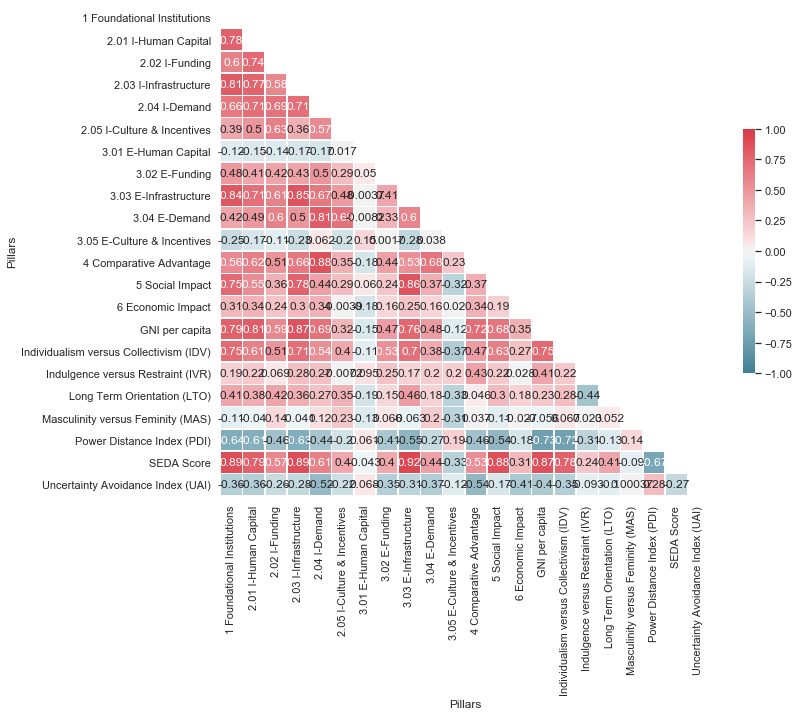

In [14]:
import seaborn as sns
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap,annot=True,vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Parte 5: Unificación de Pilares de Innovación y de Emprendimiento

Los pilares de capacidades de Innovación (2) y Emprendimiento (3) son el enfoque de esta parte del código. En particular nos interesa ver qué sucede al unificar cada uno de estos pilares, por separado, y qué sucede cuando unificamos los dos pilares. 

In [15]:
i_e_unified = df_means.T.copy()

#building i_e_unified
pillars_L = ['1 Foundational Institutions']
pillars_L += ['2 Innovation Capacity']*5 
pillars_L += ['3 Entrepreneurship Capacity']*5 
pillars_L += ['4 Comparative Advantage', 
                          '5 Social Impact',
                          '6 Economic Impact',
                          'GNI per capita' ,
                          '8 SEDA Score']
pillars_L += hofstede_pillars
i_e_unified['Pillar'] = pillars_L
i_e_unified = i_e_unified.groupby('Pillar').mean().T

#column unifying I&E capacity - each of these pilars contains 5 components
combined_L=[]
for i in range(len(i_e_unified['2 Innovation Capacity'])):
    icap = i_e_unified['2 Innovation Capacity'][i]
    ecap = i_e_unified['3 Entrepreneurship Capacity'][i]
    combined_L.append(0.5*icap + 0.5*ecap)
i_e_unified['2&3 I&E Capacity'] = combined_L
i_e_unified



#column unifying I&E capacity - each of these pilars contains 5 components
combined_L=[]
for i in range(len(i_e_unified['5 Social Impact'])):
    socim = i_e_unified['5 Social Impact'][i]
    ecoim = i_e_unified['6 Economic Impact'][i]
    combined_L.append(0.5*socim + 0.5*ecoim)
i_e_unified['5&6 Impact'] = combined_L
i_e_unified


2.240   
Qatar                                               2.744   
Romania                                             2.680   
Russian Federation                                  2.440   
Rwanda                                              2.840   
Saudi Arabia                                        2.744   
Senegal                                             3.152   
Serbia                                              2.720   
Singapore                                           2.920   
Slovak Republic                                     5.000   
Slovenia                                            1.760   
South Africa                                        3.216   
Spain                                               2.680   
Sri Lanka                                           2.984   
Sweden                                              1.200   
Switzerland                                         3.800   
Tanzania                                            2.968   
Thailand                                            2.360   
Tunisia                                             2.768   
Turkey                                              2.800   
Ukraine                                             2.808   
United Arab Emirates                                2.896   
United Kingdom                                      3.640   
United States                                       3.480   
Uruguay                                             2.520   
Vietnam                                             2.600   
Zambia                                              2.856   

Pillar                  Power Distance Index (PDI)  \
Country                                              
Albania                                      1.600   
Algeria                                      2.280   
Argentina                                    3.480   
Armenia                                      2.040   
Australia                                    3.840   
Austria                                      3.520   
Azerbaijan                                   1.880   
Bangladesh                                   1.800   
Belgium                                      3.280   
Bosnia and Herzegovina                       2.760   
Brazil                                       3.360   
Bulgaria                                     1.640   
Burundi                                      3.024   
Cambodia                                     3.096   
Cameroon                                     2.752   
Canada                                       3.720   
Chile                                        3.720   
China                                        1.960   
Colombia                                     4.320   
Costa Rica                                   2.256   
Croatia                                      2.320   
Cyprus                                       3.800   
Czech Republic                               2.160   
Denmark                                      3.800   
Dominican Republic                           3.160   
Ecuador                                      2.888   
Egypt, Arab Rep.                             1.160   
El Salvador                                  4.560   
Estonia                                      1.640   
Ethiopia                                     2.840   
Finland                                      3.280   
France                                       2.920   
Georgia                                      2.280   
Germany                                      2.600   
Ghana                                        3.880   
Greece                                       3.000   
Guatemala                                    3.208   
Honduras                                     3.088   
Hungary                                      2.240   
Iceland                                      3.680   
India                                        2.040   
Indonesia                                    2.520   
Iran, Islamic Rep.          

Obtención de la matriz de correlaciones y la visualización por medio de un Heatmap:

In [16]:
corr = i_e_unified.corr()

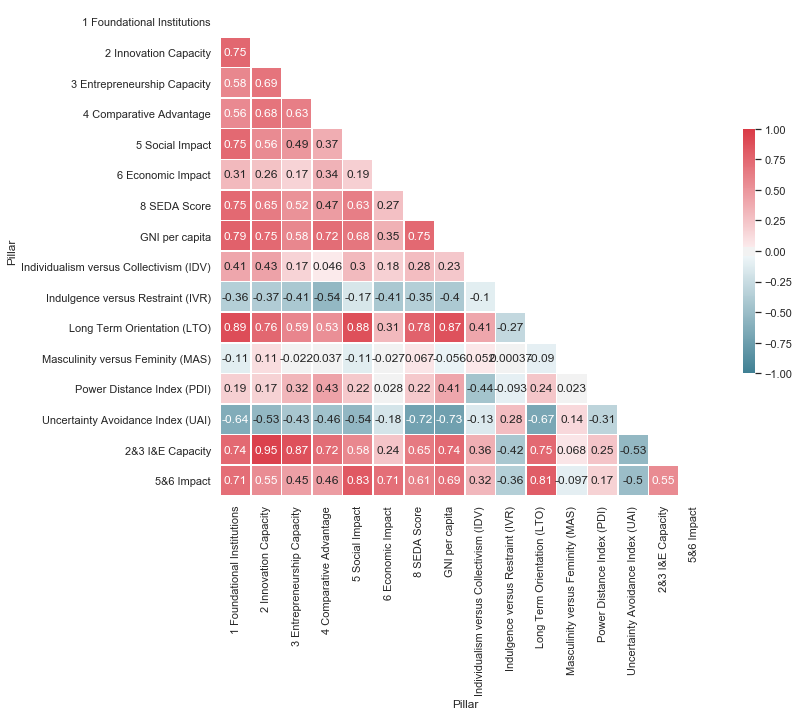

In [17]:
import seaborn as sns
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#cmap = sns.diverging_palette(10, 190, as_cmap=True)


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True,vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Para completar la lectura del Heatmap anteriormente presentado, enlistamos la lista de aquellas parejas de columnas del DataFrame `i_e_unified` que tienen una correlación significativa. 

********
Power Distance Index (PDI)
********
Correlation between:  Power Distance Index (PDI)   and   1 Foundational Institutions
**********************************************
Pearson Correlation: 0.19480411896339672, p-value: 0.04538542327580034
*Statistically significant*
***********************************************




Correlation between:  Power Distance Index (PDI)   and   3 Entrepreneurship Capacity
**********************************************
Pearson Correlation: 0.32163492880740574, p-value: 0.0007738853766927722
*Statistically significant*
***********************************************




Correlation between:  Power Distance Index (PDI)   and   4 Comparative Advantage
**********************************************
Pearson Correlation: 0.4345444326993355, p-value: 3.2514120009786286e-06
*Statistically significant*
***********************************************




Correlation between:  Power Distance Index (PDI)   and   5 Social Impact
*********************************

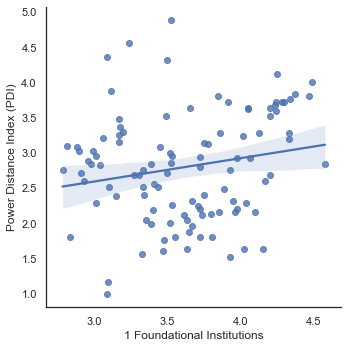

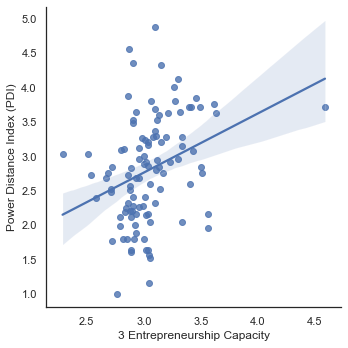

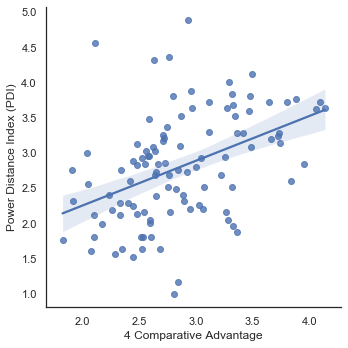

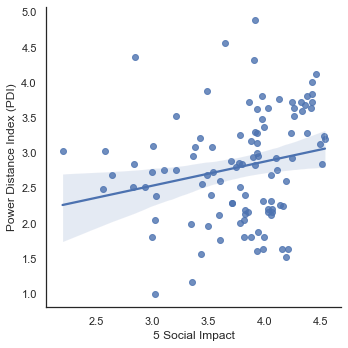

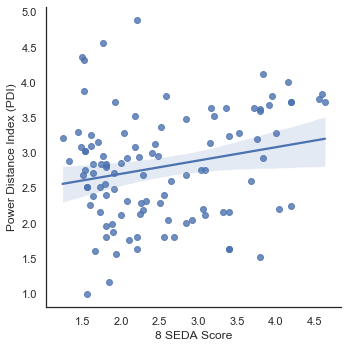

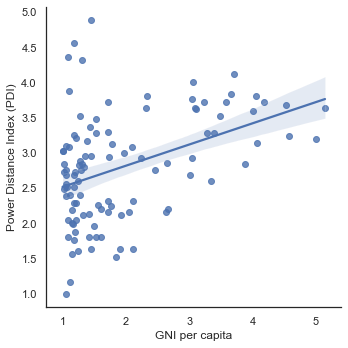

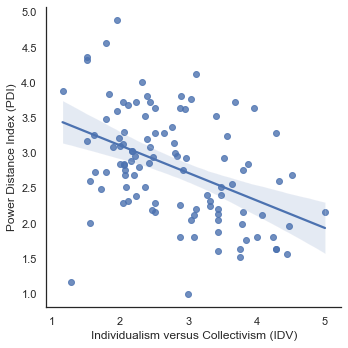

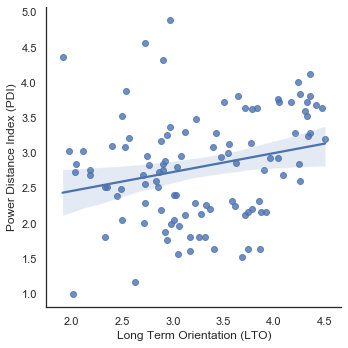

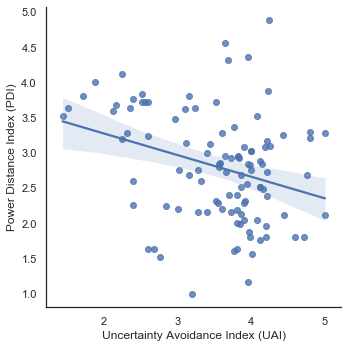

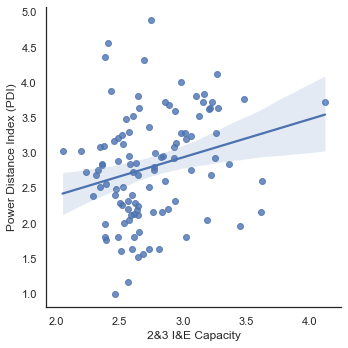

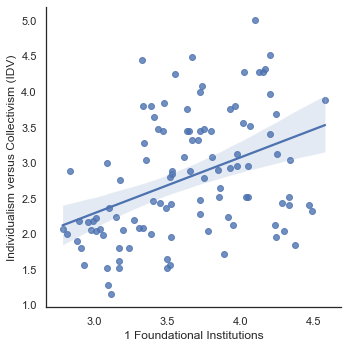

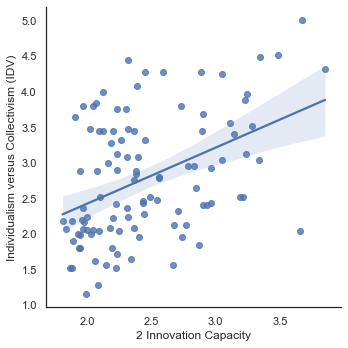

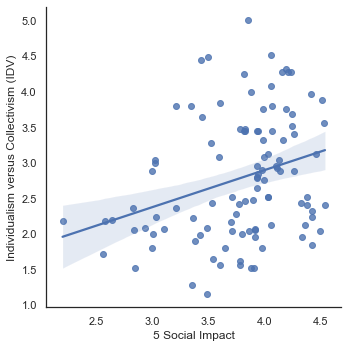

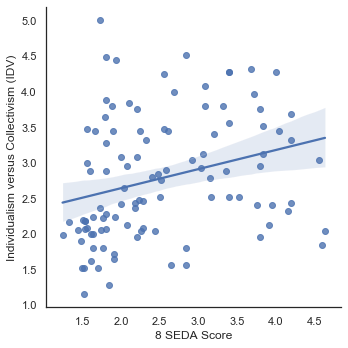

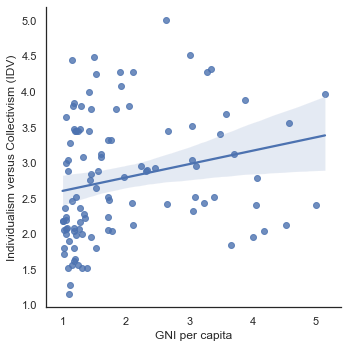

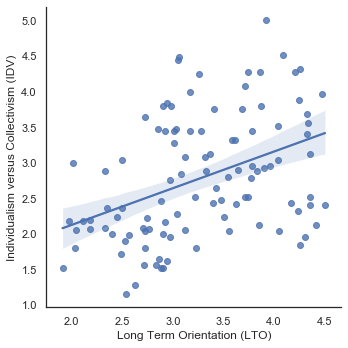

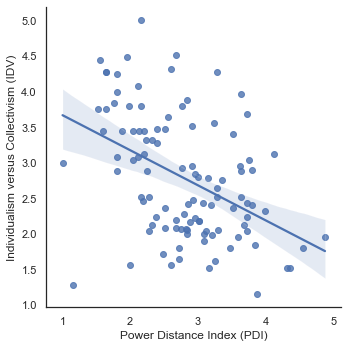

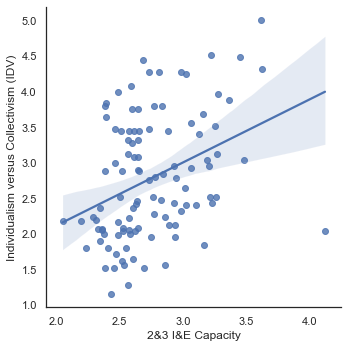

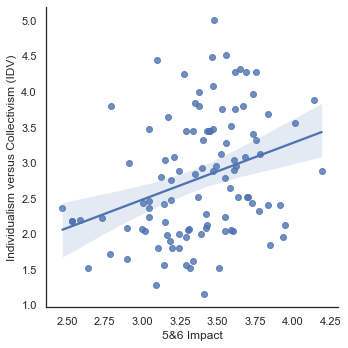

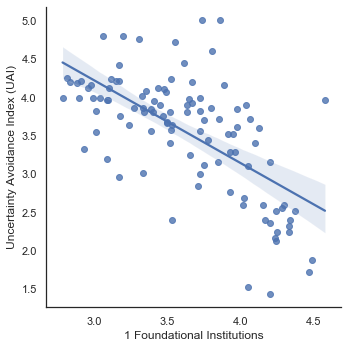

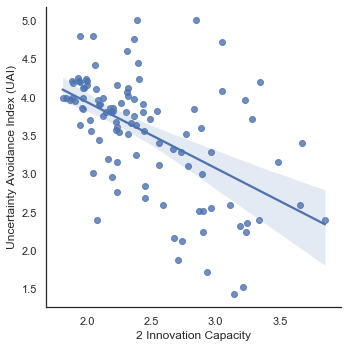

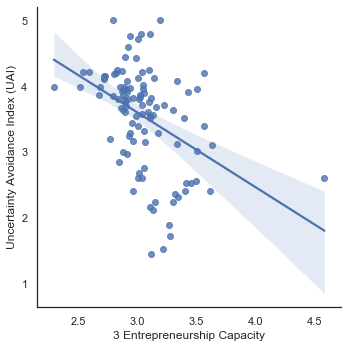

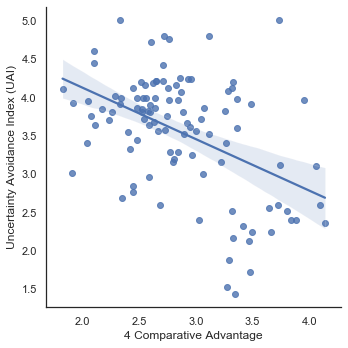

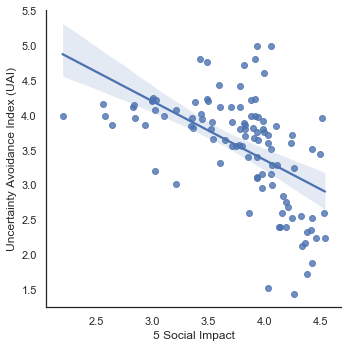

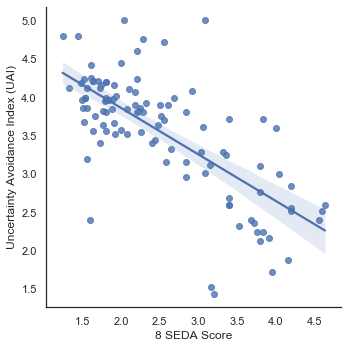

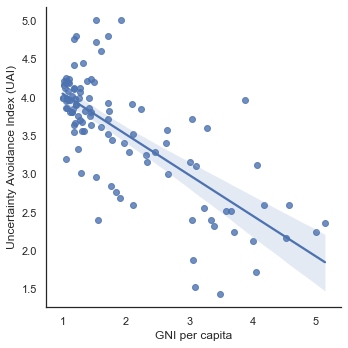

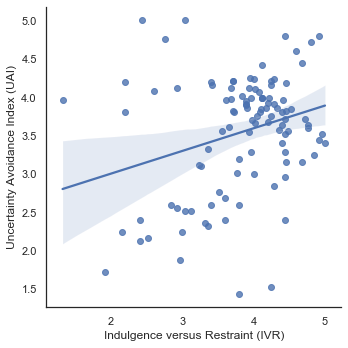

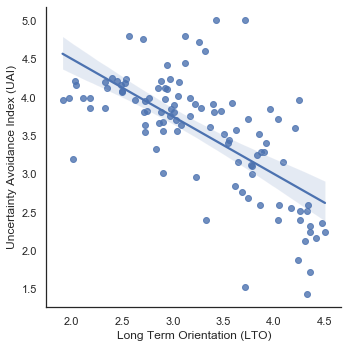

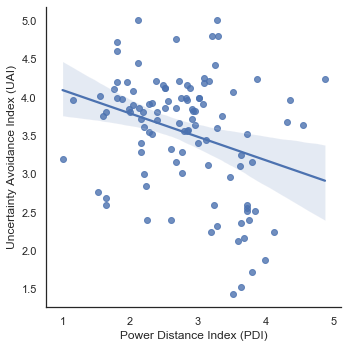

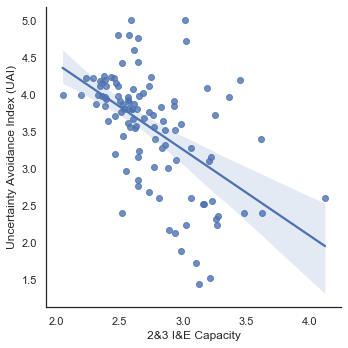

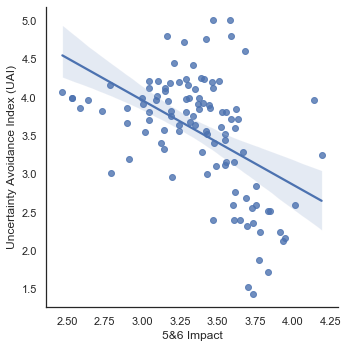

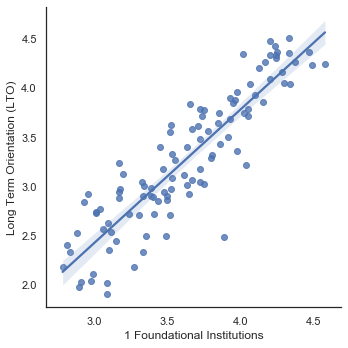

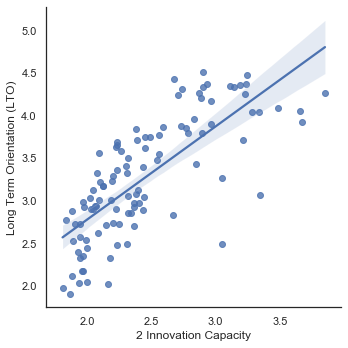

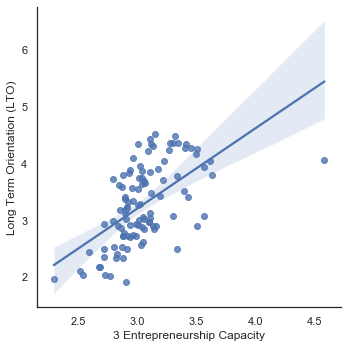

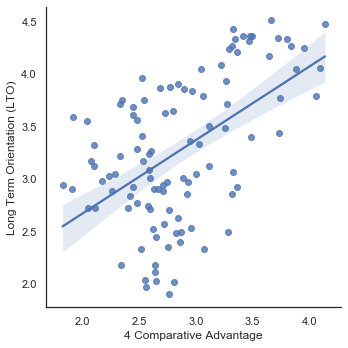

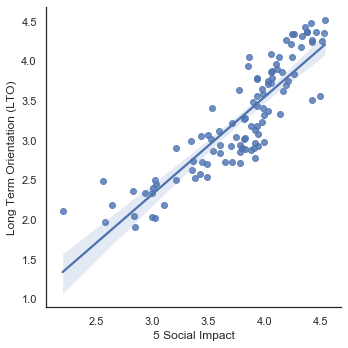

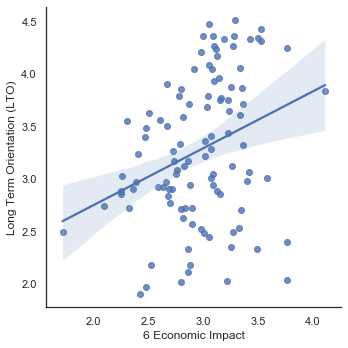

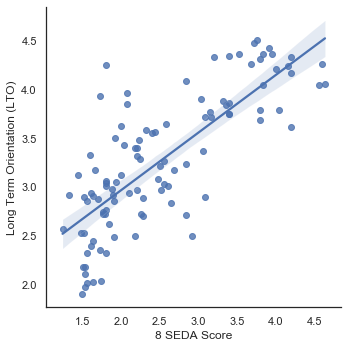

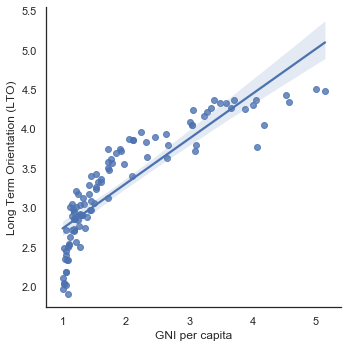

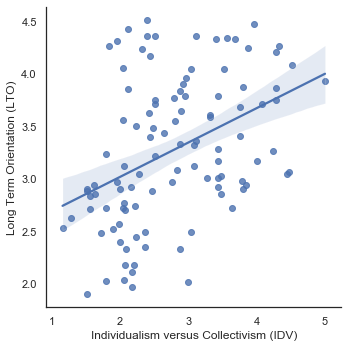

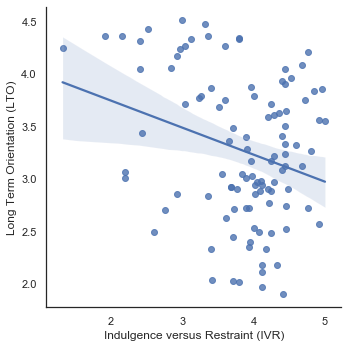

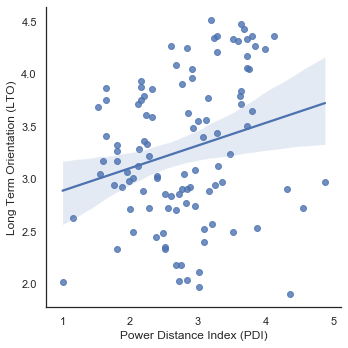

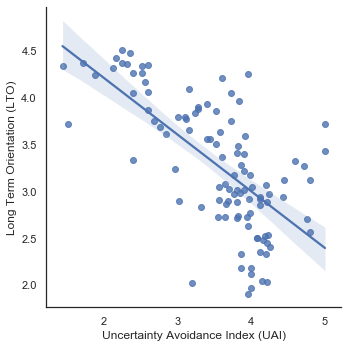

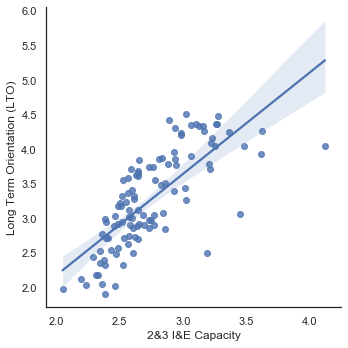

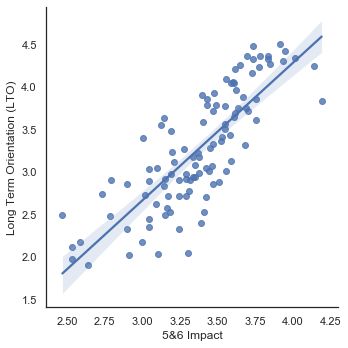

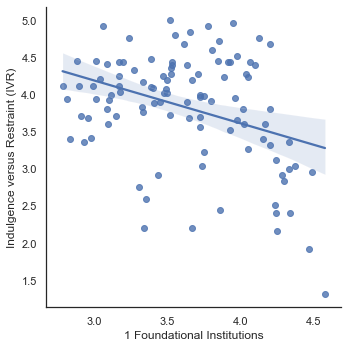

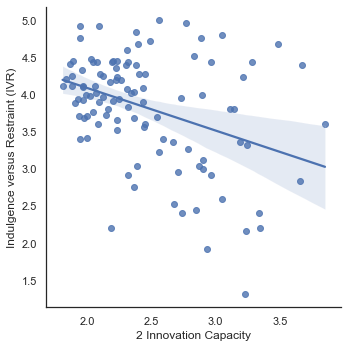

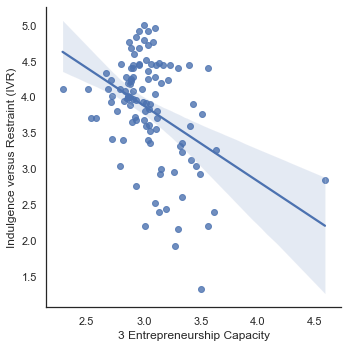

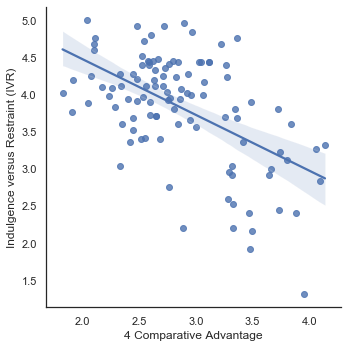

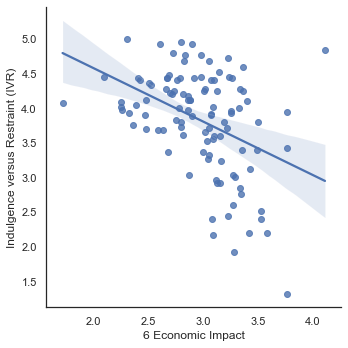

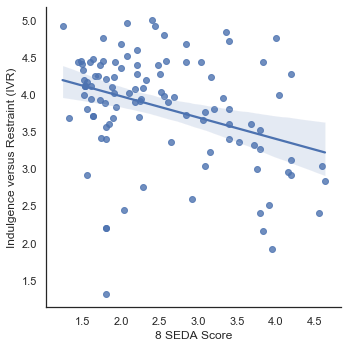

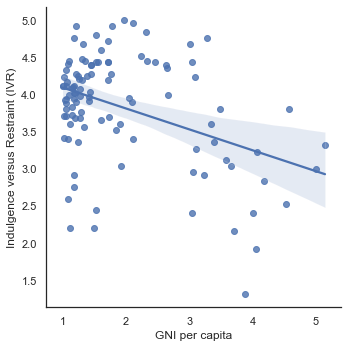

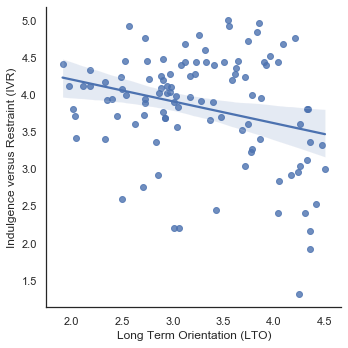

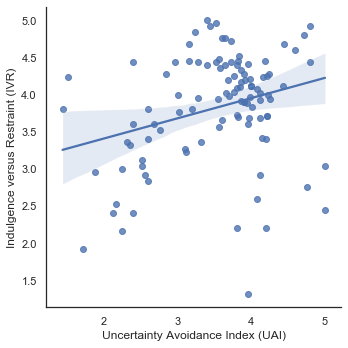

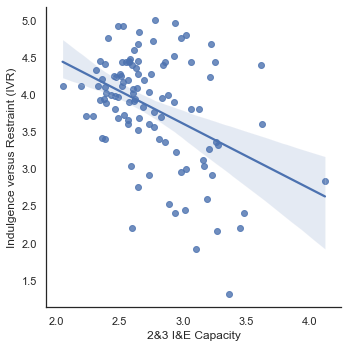

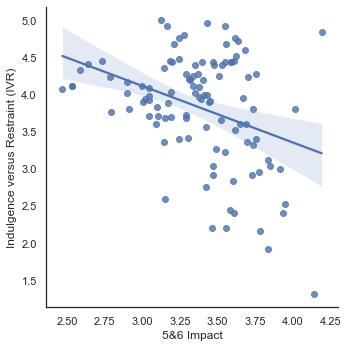

In [18]:
columns = list(i_e_unified.columns)
for c1 in hofstede_pillars:
    print('********')
    print(c1)
    print('********')
    for c2 in columns:
        if c1!=c2 and significant_corr(i_e_unified,i_e_unified,c1,c2)[0]==True:
            #correl = significant_corr(i_e_unified,i_e_unified,c1,c2)
            #print(c2, np.round(correl[1],4), correl[2])
            print_significant_corr(i_e_unified,i_e_unified,c1,c2)
            print('')
            print('')
            print('')

## Parte 6: Correlación de métricas de colaboración con Impacto

Estudiaremos qué correlaciones tienen cada una de las métricas de colaboratividad con aquellas de impacto. 

Para ello, vamos a ordenar los datos de los pilares de Impacto Social y Económico de:
* Argentina
* Brasil
* Chile
* España
* México
* Uruguay

Y vamos a leer la correlación de ambos impactos con cada una de las 11 métricas de colaboratividad con que contamos. Es decir, la métrica original y las 10 propuestas.

In [19]:
# primero conseguimos los datos de los 6 países estudiados
countries={'Mexico':'México',
          'Uruguay':'Uruguay',
          'Spain':'España',
          'Brazil':'Brasil',
          'Argentina':'Argentina',
          'Chile':'Chile'}
df_means_countries_studied = df_means.loc[list(countries.keys()), :]
df_means_countries_studied.rename(index=countries, inplace=True)

df1 = df_means_countries_studied[['5 Social Impact', '6 Economic Impact', 'GNI per capita', 'SEDA Score','Power Distance Index (PDI)','Individualism versus Collectivism (IDV)', 
            'Masculinity versus Feminity (MAS)','Uncertainty Avoidance Index (UAI)',
            'Long Term Orientation (LTO)', 
            'Indulgence versus Restraint (IVR)']]

#luego conseguimos el dataframe donde se encuentra la vieja medida de impacto
df_before_impact_split = pd.read_csv('PromediosPilares.csv')
df_before_impact_split.rename(columns={'Unnamed: 0':'Country', '5 Impact':'Impact Before'}, inplace=True)
df_before_impact_split.set_index('Country', inplace=True)
df2=df_before_impact_split[['Impact Before']]

#now we obtain colaborativities for each city
capitals = ['CABA', 'CDMX', 'Santiago', 'Montevideo', 'Madrid', 'Sao Paulo']
df3 = pd.read_csv('Ranking_cities.csv')
df3 = df3.loc[df3['Ciudad'].isin(capitals)]
df3 = df3.drop('Ciudad', axis=1)
df3.rename(columns={'País':'Country'}, inplace=True)
df3.set_index('Country', inplace=True)

#df1
#df2
#df3


#and finally we concatenate!
df = pd.concat([df1, df2, df3], axis=1)
df

5 Social Impact  6 Economic Impact  GNI per capita  SEDA Score  \
México            3.916166           2.665218        1.440818       2.968   
Uruguay           4.495705           2.605598        1.772041       3.560   
España            4.111115           2.675696        2.461763       3.900   
Brasil            3.996738           2.389177        1.426206       2.972   
Argentina         3.984246           2.405071        1.527034       3.232   
Chile             4.424643           2.676299        1.712616       3.504   

           Power Distance Index (PDI)  \
México                           4.24   
Uruguay                          3.44   
España                           3.28   
Brasil                           3.76   
Argentina                        2.96   
Chile                            3.52   

           Individualism versus Collectivism (IDV)  \
México                                        2.20   
Uruguay                                       2.44   
España                                        3.04   
Brasil                                        2.52   
Argentina                                     2.84   
Chile                                         1.92   

           Masculinity versus Feminity (MAS)  \
México                                  3.76   
Uruguay                                 2.52   
España                                  2.68   
Brasil                                  2.96   
Argentina                               3.24   
Chile                                   2.12   

           Uncertainty Avoidance Index (UAI)  Long Term Orientation (LTO)  \
México                                  4.28                         1.96   
Uruguay                                 4.92                         2.04   
España                                  4.44                         2.92   
Brasil                                  4.04                         2.76   
Argentina                               4.44                         1.80   
Chile                                   4.44                         2.24   

           Indulgence versus Restraint (IVR)  Impact Before   Colab 0  \
México                                  4.88       3.725455  3.636191   
Uruguay                                 3.12       4.147576  8.471255   
España                                  2.76       3.864545  4.256043   
Brasil                                  3.36       3.671818  3.258518   
Argentina                               3.48       3.781818  5.773443   
Chile                                   3.72       4.091818  5.571009   

            Colab 1   Colab 2   Colab 3   Colab 4   Colab 5   Colab 6  \
México     0.817118 -0.105809  0.252593  0.165183  0.917916  0.197206   
Uruguay    1.124532  0.452584  0.456651  0.387565  1.019704  0.373899   
España     0.853905 -0.064943  0.297935  0.201023  0.937239  0.228465   
Brasil     0.793642 -0.188052  0.262453  0.168783  0.923994  0.211309   
Argentina  0.921857  0.114574  0.355051  0.252040  0.937550  0.277219   
Chile      0.956748  0.103005  0.360724  0.247697  1.008863  0.271107   

            Colab 7   Colab 8   Colab 9  Colab 10  Colab 11  Colab 12  \
México     0.286659  0.308942  0.304868  0.397667  0.267167  0.266965   
Uruguay    0.349355  0.431910  0.385176  0.588490  0.360937  0.360646   
España     0.287951  0.316629  0.309405  0.426240  0.286349  0.278308   
Brasil     0.255960  0.269424  0.284577  0.384944  0.250892  0.251874   
Argentina  0.322560  0.364099  0.343969  0.492850  0.314246  0.312265   
Chile      0.316215  0.357342  0.340056  0.480988  0.311826  0.293944   

           Colab 13  Colab 14  Colab 10 rescaled  Ranking 0  Ranking 1  \
México     0.342306  0.320264           4.976668          9         10   
Uruguay    0.436381  0.502732           6.884901          2          2   
España     0.353561  0.403647           5.262402          6          9   
Brasil     0.326146  0.295488           4.849443         10         11   
Argentina  0.388024  

In [20]:
impacts = ['5 Social Impact', '6 Economic Impact', 'Impact Before', 'GNI per capita', 'SEDA Score']
others = list(df.columns)
for i in impacts:
    others.remove(i)
    
significants = {x:[] for x in impacts}


df_correls = pd.DataFrame()
df_correls['Correl data'] = others
for i in impacts:
    booleans_i = []
    correls_i = []
    p_vals_i = []
    for c in others:
        triple = significant_corr(df,df,i,c)
        booleans_i.append(triple[0])
        correls_i.append(triple[1])
        p_vals_i.append(triple[2])
        if triple[0]==True:
            significants[i].append(c)
    df_correls['Significant with '+str(i)] = booleans_i
    df_correls['R^2 with '+str(i)] = correls_i
    df_correls['P-value with '+str(i)] = p_vals_i

    
df_correls       

0.098044   
10                               False                    0.101552   
11                               False                    0.364883   
12                               False                    0.043083   
13                               False                    0.231640   
14                               False                    0.221488   
15                               False                    0.178789   
16                               False                    0.105932   
17                               False                    0.201234   
18                               False                    0.103686   
19                               False                    0.108498   
20                               False                    0.228282   
21                               False                    0.105932   
22                               False                   -0.134392   
23                               False                   -0.299424   
24                               False                   -0.136120   
25                               False                   -0.075097   
26                               False                    0.065207   
27                               False                   -0.166324   
28                               False                   -0.008959   
29                               False                   -0.244599   
30                               False                   -0.188015   
31                               False                   -0.107182   
32                               False                   -0.065615   
33                               False                   -0.153124   
34                               False                   -0.022284   
35                               False                   -0.066032   
36                               False                   -0.174118   
37                               False                   -0.065615   
38                               False                   -0.118660   
39                               False                   -0.331607   
40                               False                   -0.118660   
41                               False                   -0.114881   
42                               False                    0.098066   
43                               False                   -0.114881   
44                               False                    0.098066   
45                               False                   -0.118660   
46                               False                   -0.118660   
47                               False                   -0.118660   
48                               False                   -0.118660   
49                               False                   -0.118660   
50                               False                   -0.118660   
51                               False                   -0.118660   
52                               False                   -0.118660   
53                               False                   -0.118660   

    P-value with 6 Economic Impact  Significant with Impact Before  \
0                         0.562596                           False   
1                         0.508395                           False   
2                         0.608565                           False   
3                         0.459959                            True   
4                         0.918739                           False   
5                         0.725198                           False   
6                         0.812414                            True   
7                         0.697114                            True   
8                         0.758402                            True   
9                         0.853405                            True   
10                        0.848196                            True   
11                        0.476965                            True 

## Parte 7: Correlación de iEcos con métricas de los grafos

Hacemos lo mismo de arriba, solo que esta vez incluiremos todas las métricas de los grafos, y todas las métricas de iEcosystems. Sin y con unificación de las Capacidades de Innovación y Emprendimiento.

#### Sin unificación

Primero conseguimos 
  *  `df1`: los datos de los 6 países estudiados
  *  `df2`: columna mostrando la medida de impacto anterior a la separación en impacto social y económico
  *  `df3`: información de las colaboratividades de cada ciudad

Y luego, los unificamos en `df`, un DataFrame que seguiremos estudiando.

In [21]:
#DF1 df_means restringido a los 6 paises estudiados
countries={'Mexico':'México', 'Uruguay':'Uruguay', 'Spain':'España', 'Brazil':'Brasil', 'Argentina':'Argentina', 'Chile':'Chile'}
df_means_countries_studied = df_means.loc[list(countries.keys()), :]
df_means_countries_studied.rename(index=countries, inplace=True)
df1 = df_means_countries_studied

#DF3 vieja medida de impacto
df_before_impact_split = pd.read_csv('PromediosPilares.csv')
df_before_impact_split.rename(columns={'Unnamed: 0':'Country', '5 Impact':'Impact Before'}, inplace=True)
df_before_impact_split.set_index('Country', inplace=True)
df2=df_before_impact_split[['Impact Before']]

#DF3 colaboratividad por ciudad 
capitals = ['CABA', 'CDMX', 'Santiago', 'Montevideo', 'Madrid', 'Sao Paulo']
df3 = pd.read_csv('Ranking_cities.csv')
df3 = df3[['Ciudad', 'País', 'Colab 10', 'Ranking Capitals 10']]
df3 = df3.loc[df3['Ciudad'].isin(capitals)]
df3 = df3.drop('Ciudad', axis=1)
df3.rename(columns={'País':'Country'}, inplace=True)
df3.set_index('Country', inplace=True)

#df1
#df2
#df3


#and finally we concatenate!
df_i_e_separate = pd.concat([df1, df2, df3], axis=1)
df_i_e_separate

1 Foundational Institutions  2.01 I-Human Capital  2.02 I-Funding  \
México                          3.5224              2.363914        1.238062   
Uruguay                         3.7808              2.346297        1.464989   
España                          3.9268              2.822386        1.899159   
Brasil                          3.1780              1.826706        1.675010   
Argentina                       3.1684              2.021985        1.682002   
Chile                           3.9124              2.399177        1.184934   

           2.03 I-Infrastructure  2.04 I-Demand  2.05 I-Culture & Incentives  \
México                  2.782979       3.102667                       2.5160   
Uruguay                 2.833698       2.578222                       1.2428   
España                  3.191020       3.077333                       3.8300   
Brasil                  2.707140       2.879111                       2.7542   
Argentina               2.740698       2.729778                       1.7930   
Chile                   3.100109       2.965778                       1.9536   

           3.01 E-Human Capital  3.02 E-Funding  3.03 E-Infrastructure  \
México                 3.117368        2.299475               3.701600   
Uruguay                3.046434        2.006035               3.926000   
España                 3.189806        2.423851               4.264933   
Brasil                 2.975761        1.991287               3.694933   
Argentina              3.076940        1.725475               3.679067   
Chile                  4.154179        2.207990               3.935067   

           3.04 E-Demand  3.05 E-Culture & Incentives  \
México            3.4260                     2.953330   
Uruguay           2.7408                     3.051111   
España            3.3650                     2.614589   
Brasil            3.4638                     3.376030   
Argentina         3.1718                     2.891282   
Chile             3.2030                     3.469417   

           4 Comparative Advantage  5 Social Impact  6 Economic Impact  \
México                    2.928133         3.916166           2.665218   
Uruguay                   2.482667         4.495705           2.605598   
España                    2.839333         4.111115           2.675696   
Brasil                    2.741067         3.996738           2.389177   
Argentina                 2.583067         3.984246           2.405071   
Chile                     3.111200         4.424643           2.676299   

           GNI per capita  Individualism versus Collectivism (IDV)  \
México           1.440818                                     2.20   
Uruguay          1.772041                                     2.44   
España           2.461763                                     3.04   
Brasil           1.426206                                     2.52   
Argentina        1.527034                                     2.84   
Chile            1.712616                                     1.92   

           Indulgence versus Restraint (IVR)  Long Term Orientation (LTO)  \
México                                  4.88                         1.96   
Uruguay                                 3.12                         2.04   
España                                  2.76                         2.92   
Brasil                                  3.36                         2.76   
Argentina                               3.48                         1.80   
Chile                                   3.72                         2.24   

           Masculinity versus Feminity (MAS)  Power Distance Index (PDI)  \
México                                  3.76                        4.24   
Uruguay                                 2.52                        3.44   
España                                  2.68                        3.28   
Brasil                                  2.96                        3.76   
Argentina                               

#### Con unificación de innovación y emprendimiento

Primero conseguimos 
  *  `df1`: los datos de los 6 países estudiados, con Innovación y Emprendimiento unificados
  *  `df2`: columna mostrando la medida de impacto anterior a la separación en impacto social y económico
  *  `df3`: información de las colaboratividades de cada ciudad

Y luego, los unificamos en `df`, un DataFrame que seguiremos estudiando.

In [22]:
#DF1 i_e_unified restringido a los 6 paises estudiados
countries={'Mexico':'México', 'Uruguay':'Uruguay', 'Spain':'España', 'Brazil':'Brasil', 'Argentina':'Argentina', 'Chile':'Chile'}
df_means_countries_studied = i_e_unified.loc[list(countries.keys()), :]
df_means_countries_studied.rename(index=countries, inplace=True)
df1 = df_means_countries_studied

#DF3 vieja medida de impacto
df_before_impact_split = pd.read_csv('PromediosPilares.csv')
df_before_impact_split.rename(columns={'Unnamed: 0':'Country', '5 Impact':'Impact Before'}, inplace=True)
df_before_impact_split.set_index('Country', inplace=True)
df2=df_before_impact_split[['Impact Before']]

#DF3 colaboratividad por ciudad 
capitals = ['CABA', 'CDMX', 'Santiago', 'Montevideo', 'Madrid', 'Sao Paulo']
df3 = pd.read_csv('Ranking_cities.csv')
df3 = df3[['Ciudad', 'País', 'Colab 10', 'Ranking Capitals 10']]  #

for i in range(len(df3['Ranking Capitals 10'])):
    df3['Ranking Capitals 10'][i] *= -1
    df3['Ranking Capitals 10'][i] += 7

df3 = df3.loc[df3['Ciudad'].isin(capitals)]                       #only take capital cities
df3 = df3.drop('Ciudad', axis=1)
df3.rename(columns={'País':'Country', 'Ranking Capitals 10':'Inverted Ranking Capitals 10'}, inplace=True)
df3.set_index('Country', inplace=True)

#df1
#df2
#df3


#and finally we concatenate!
df_i_e_unified = pd.concat([df1, df2, df3], axis=1)
df_i_e_unified

1 Foundational Institutions  2 Innovation Capacity  \
México                          3.5224               2.400724   
Uruguay                         3.7808               2.093201   
España                          3.9268               2.963980   
Brasil                          3.1780               2.368433   
Argentina                       3.1684               2.193493   
Chile                           3.9124               2.320720   

           3 Entrepreneurship Capacity  4 Comparative Advantage  \
México                        3.099555                 2.928133   
Uruguay                       2.954076                 2.482667   
España                        3.171636                 2.839333   
Brasil                        3.100362                 2.741067   
Argentina                     2.908913                 2.583067   
Chile                         3.393930                 3.111200   

           5 Social Impact  6 Economic Impact  8 SEDA Score  GNI per capita  \
México            3.916166           2.665218          2.20        1.440818   
Uruguay           4.495705           2.605598          2.44        1.772041   
España            4.111115           2.675696          3.04        2.461763   
Brasil            3.996738           2.389177          2.52        1.426206   
Argentina         3.984246           2.405071          2.84        1.527034   
Chile             4.424643           2.676299          1.92        1.712616   

           Individualism versus Collectivism (IDV)  \
México                                        1.96   
Uruguay                                       2.04   
España                                        2.92   
Brasil                                        2.76   
Argentina                                     1.80   
Chile                                         2.24   

           Indulgence versus Restraint (IVR)  Long Term Orientation (LTO)  \
México                                  4.28                        2.968   
Uruguay                                 4.92                        3.560   
España                                  4.44                        3.900   
Brasil                                  4.04                        2.972   
Argentina                               4.44                        3.232   
Chile                                   4.44                        3.504   

           Masculinity versus Feminity (MAS)  Power Distance Index (PDI)  \
México                                  3.76                        4.88   
Uruguay                                 2.52                        3.12   
España                                  2.68                        2.76   
Brasil                                  2.96                        3.36   
Argentina                               3.24                        3.48   
Chile                                   2.12                        3.72   

           Uncertainty Avoidance Index (UAI)  2&3 I&E Capacity  5&6 Impact  \
México                                  4.24          2.750139    3.290692   
Uruguay                                 3.44          2.523639    3.550652   
España                                  3.28          3.067808    3.393406   
Brasil                                  3.76          2.734398    3.192957   
Argentina                               2.96          2.551203    3.194659   
Chile                                   3.52          2.857325    3.550471   

           Impact Before  Colab 10  Inverted Ranking Capitals 10  
México          3.725455  0.397667                           2.0  
Uruguay         4.147576  0.588490                           6.0  
España          3.864545  0.426240                           3.0  
Brasil          3.671818  0.384944                           1.0  
Argentina       3.781818  0.492850                           5.0  
Chile           4.091818  0.480988                           4.0

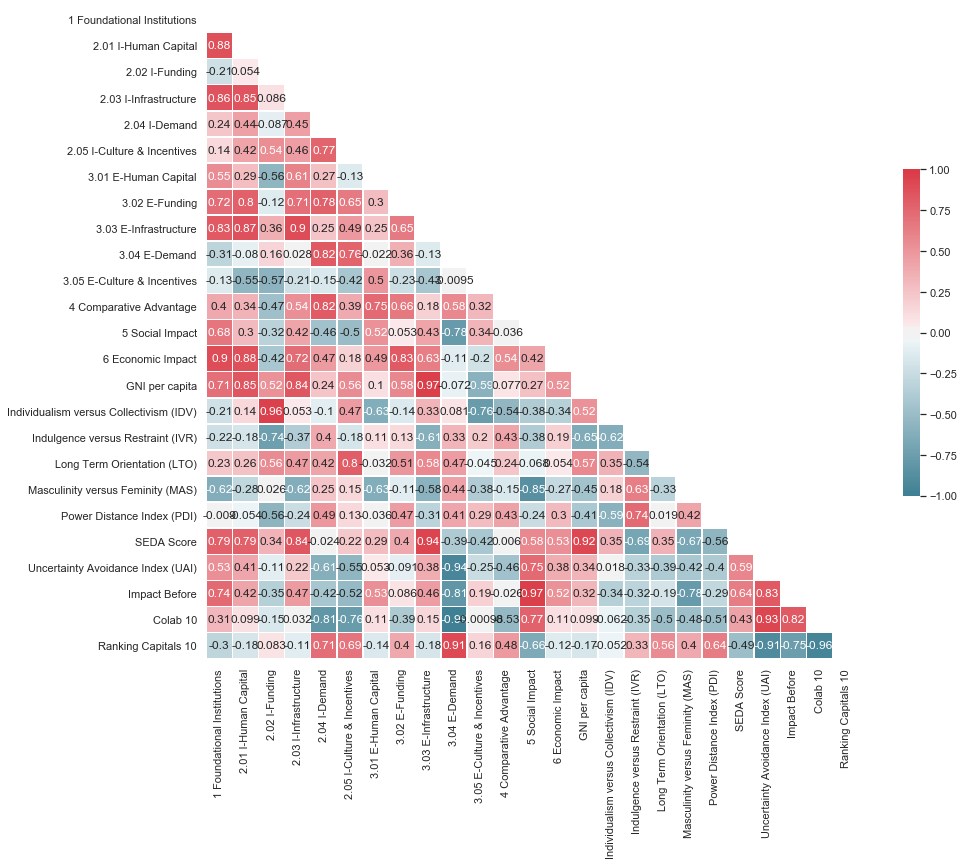

In [23]:
corr = df_i_e_separate.corr()

import seaborn as sns
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap,annot=True,vmin=-1, vmax=1, center=0,
            square=True, linewidths=.6, cbar_kws={"shrink": .5})

In [24]:
all_df=df_i_e_separate.copy()
placeholder=pd.read_csv('Tidy_DataFrame.csv')
capitalnames = ['CDMX', 'CABA', 'Santiago', 'Sao Paulo', 'Madrid', 'Montevideo']
placeholder = placeholder.loc[placeholder['Ciudad'].isin(capitalnames)]

#index: País
placeholder = placeholder.drop('Ciudad',axis=1)
placeholder.set_index('País', inplace=True)

all_df=pd.concat([all_df,placeholder],axis=1)
all_df=all_df.drop('Weighted Degree',axis=1)
all_df=all_df.drop('weight',axis=1)
all_df=all_df.drop('Camino más corto promedio',axis=1)
for i in range(15):
    all_df=all_df.drop('Colab '+str(i),axis=1)
all_df

1 Foundational Institutions  2.01 I-Human Capital  2.02 I-Funding  \
México                          3.5224              2.363914        1.238062   
Uruguay                         3.7808              2.346297        1.464989   
España                          3.9268              2.822386        1.899159   
Brasil                          3.1780              1.826706        1.675010   
Argentina                       3.1684              2.021985        1.682002   
Chile                           3.9124              2.399177        1.184934   

           2.03 I-Infrastructure  2.04 I-Demand  2.05 I-Culture & Incentives  \
México                  2.782979       3.102667                       2.5160   
Uruguay                 2.833698       2.578222                       1.2428   
España                  3.191020       3.077333                       3.8300   
Brasil                  2.707140       2.879111                       2.7542   
Argentina               2.740698       2.729778                       1.7930   
Chile                   3.100109       2.965778                       1.9536   

           3.01 E-Human Capital  3.02 E-Funding  3.03 E-Infrastructure  \
México                 3.117368        2.299475               3.701600   
Uruguay                3.046434        2.006035               3.926000   
España                 3.189806        2.423851               4.264933   
Brasil                 2.975761        1.991287               3.694933   
Argentina              3.076940        1.725475               3.679067   
Chile                  4.154179        2.207990               3.935067   

           3.04 E-Demand  3.05 E-Culture & Incentives  \
México            3.4260                     2.953330   
Uruguay           2.7408                     3.051111   
España            3.3650                     2.614589   
Brasil            3.4638                     3.376030   
Argentina         3.1718                     2.891282   
Chile             3.2030                     3.469417   

           4 Comparative Advantage  5 Social Impact  6 Economic Impact  \
México                    2.928133         3.916166           2.665218   
Uruguay                   2.482667         4.495705           2.605598   
España                    2.839333         4.111115           2.675696   
Brasil                    2.741067         3.996738           2.389177   
Argentina                 2.583067         3.984246           2.405071   
Chile                     3.111200         4.424643           2.676299   

           GNI per capita  Individualism versus Collectivism (IDV)  \
México           1.440818                                     2.20   
Uruguay          1.772041                                     2.44   
España           2.461763                                     3.04   
Brasil           1.426206                                     2.52   
Argentina        1.527034                                     2.84   
Chile            1.712616                                     1.92   

           Indulgence versus Restraint (IVR)  Long Term Orientation (LTO)  \
México                                  4.88                         1.96   
Uruguay                                 3.12                         2.04   
España                                  2.76                         2.92   
Brasil                                  3.36                         2.76   
Argentina                               3.48                         1.80   
Chile                                   3.72                         2.24   

           Masculinity versus Feminity (MAS)  Power Distance Index (PDI)  \
México                                  3.76                        4.24   
Uruguay                                 2.52                        3.44   
España                                  2.68                        3.28   
Brasil                                  2.96                        3.76   
Argentina                               

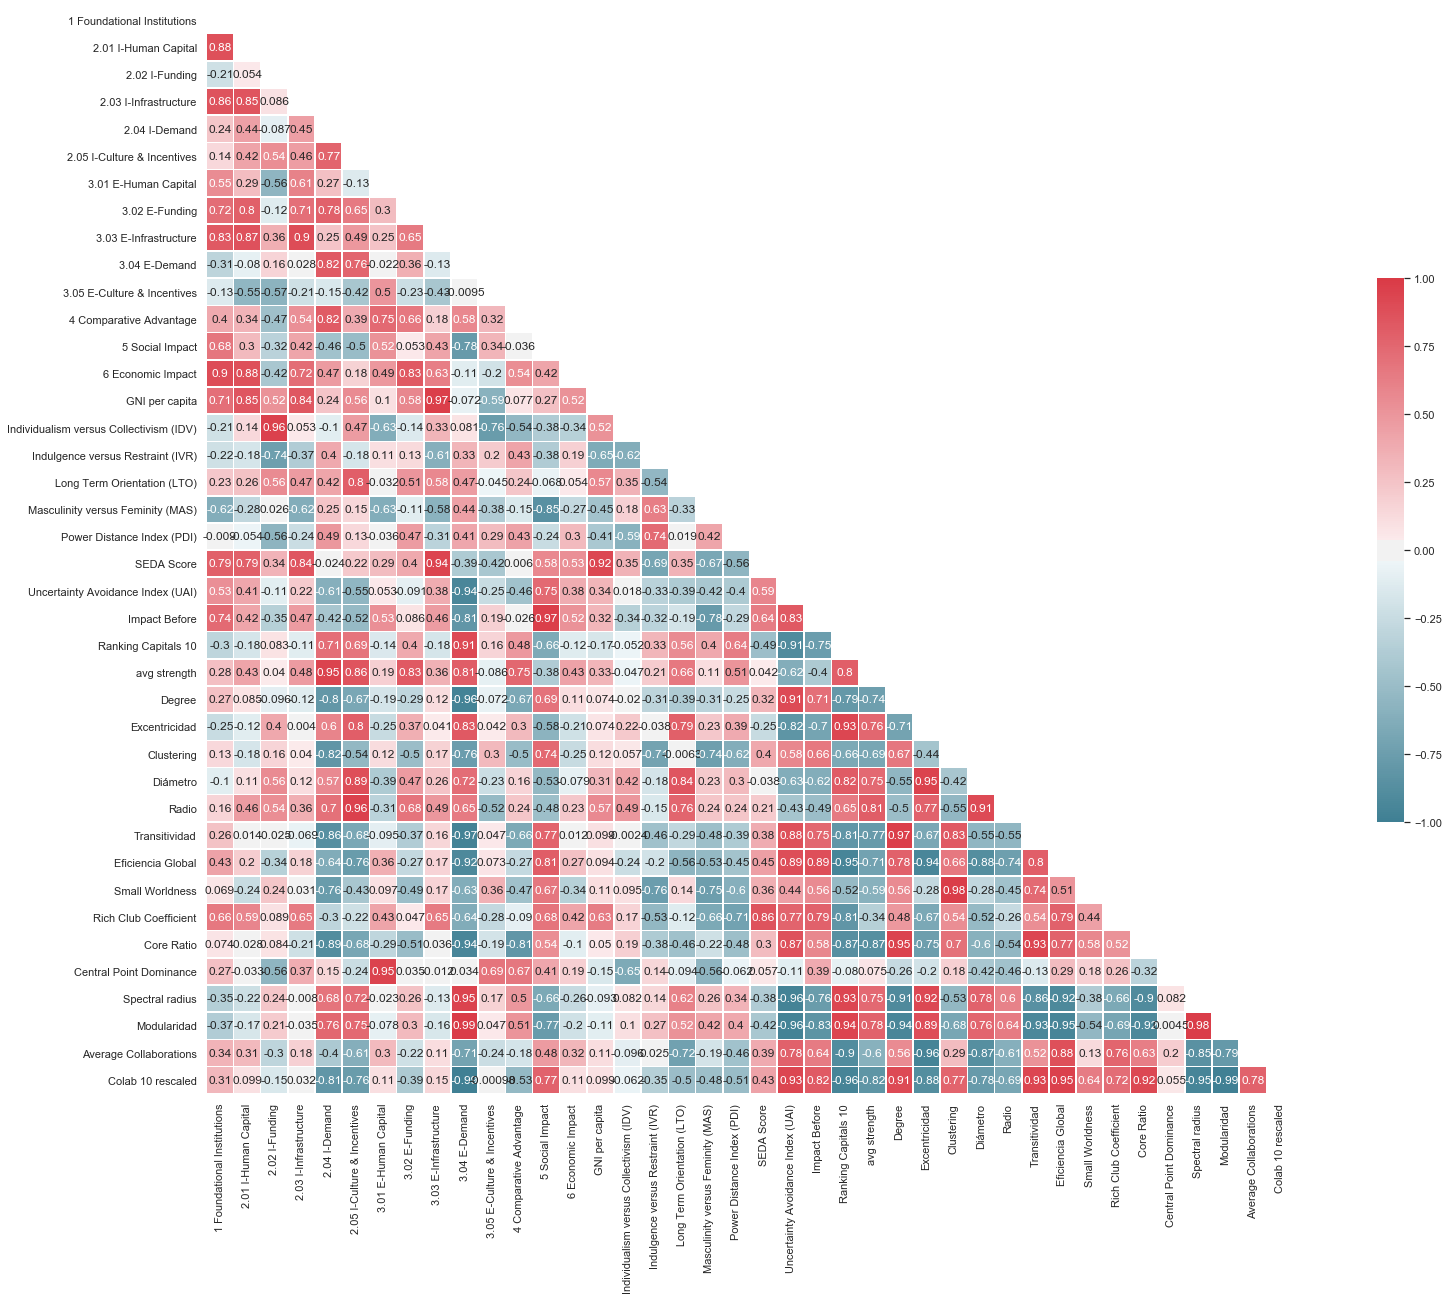

In [25]:
corr = all_df.corr()

import seaborn as sns
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap,annot=True,vmin=-1, vmax=1, center=0,
            square=True, linewidths=.6, cbar_kws={"shrink": .5})

********
Power Distance Index (PDI)
********
********
Individualism versus Collectivism (IDV)
********
********
Masculinity versus Feminity (MAS)
********
Correlation between:  Masculinity versus Feminity (MAS)   and   5 Social Impact
**********************************************
Pearson Correlation: -0.852481026873602, p-value: 0.0310376284551297
*Statistically significant*
***********************************************




********
Uncertainty Avoidance Index (UAI)
********
Correlation between:  Uncertainty Avoidance Index (UAI)   and   Impact Before
**********************************************
Pearson Correlation: 0.8344229960197125, p-value: 0.038853907973470894
*Statistically significant*
***********************************************




Correlation between:  Uncertainty Avoidance Index (UAI)   and   Colab 10 rescaled
**********************************************
Pearson Correlation: 0.9335816841623401, p-value: 0.006470590381957427
*Statistically significant*
*************

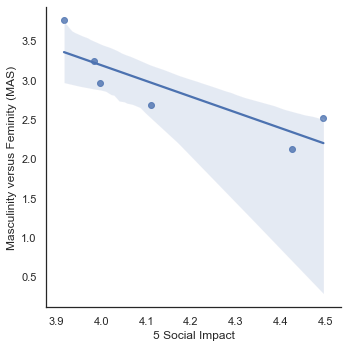

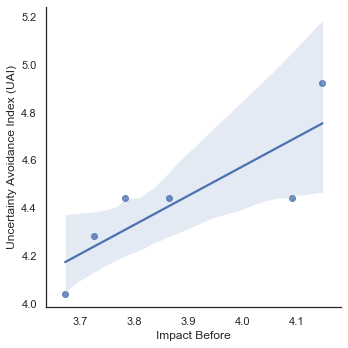

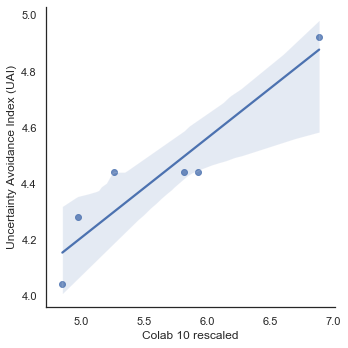

In [28]:
columns = ['5 Social Impact', '6 Economic Impact', 'Impact Before', 'GNI per capita', 'SEDA Score', 'Colab 10 rescaled']
for c1 in hofstede_pillars:
    print('********')
    print(c1)
    print('********')
    for c2 in columns:
        if c1!=c2 and significant_corr(all_df,all_df,c1,c2)[0]==True:
            #correl = significant_corr(i_e_unified,i_e_unified,c1,c2)
            #print(c2, np.round(correl[1],4), correl[2])
            print_significant_corr(all_df,all_df,c1,c2)
            print('')
            print('')
            print('')

### Correlaciones significativas

Por último en esta sección, vamos a imprimir aquellas correlaciones que son significativas. 

Correlation between:  1 Foundational Institutions   and   6 Economic Impact
**********************************************
Pearson Correlation: 0.9043133220626562, p-value: 0.013295859745018155
*Statistically significant*
***********************************************


Correlation between:  2 Innovation Capacity   and   2&3 I&E Capacity
**********************************************
Pearson Correlation: 0.9187875202998865, p-value: 0.009625383179360682
*Statistically significant*
***********************************************


Correlation between:  3 Entrepreneurship Capacity   and   4 Comparative Advantage
**********************************************
Pearson Correlation: 0.9198680484544963, p-value: 0.009374425662405629
*Statistically significant*
***********************************************


Correlation between:  4 Comparative Advantage   and   3 Entrepreneurship Capacity
**********************************************
Pearson Correlation: 0.9198680484544963, p-value: 0.0093

/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)



Correlation between:  Inverted Ranking Capitals 10   and   Colab 10
**********************************************
Pearson Correlation: 0.9586677732673268, p-value: 0.002527224433942512
*Statistically significant*
***********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


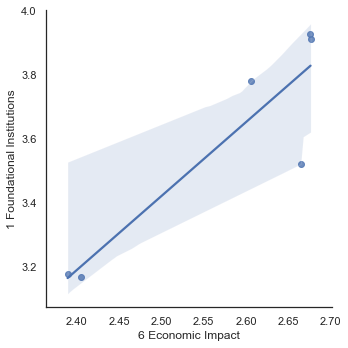

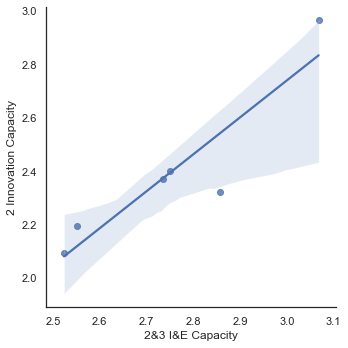

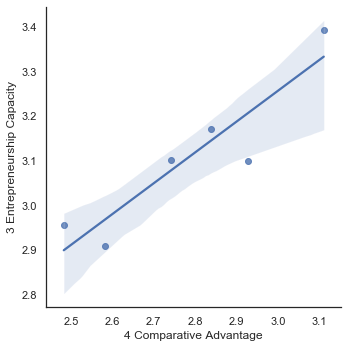

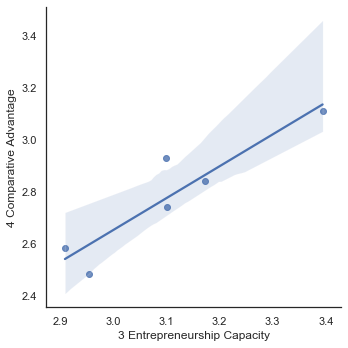

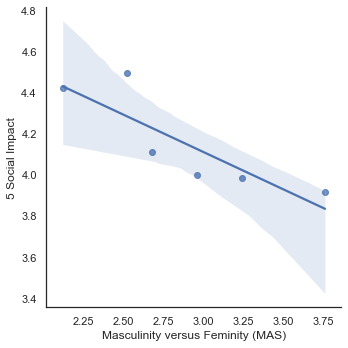

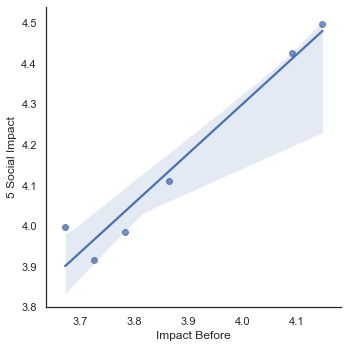

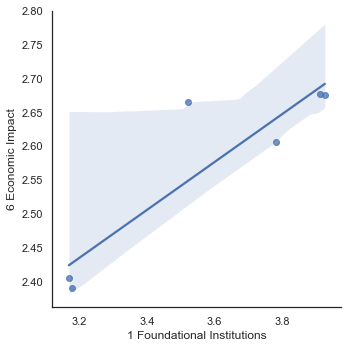

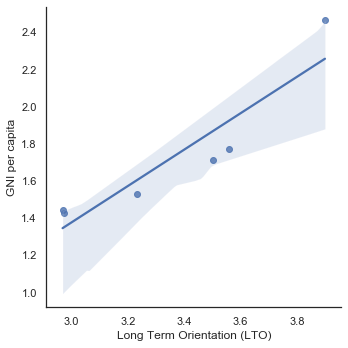

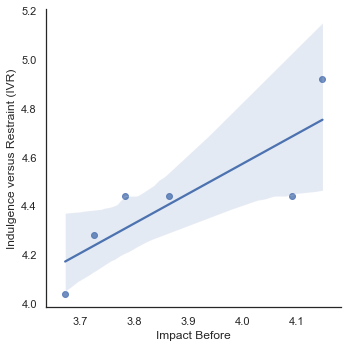

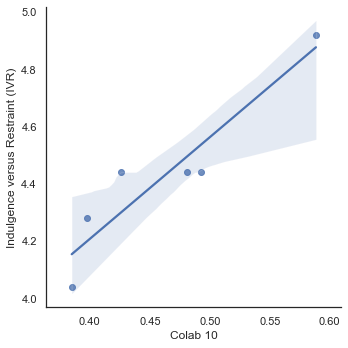

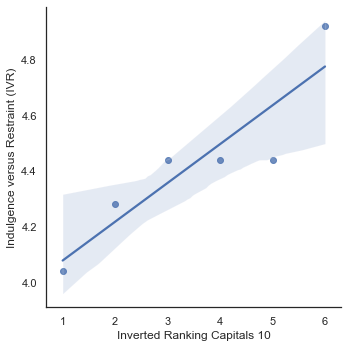

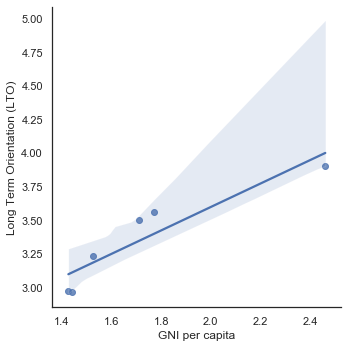

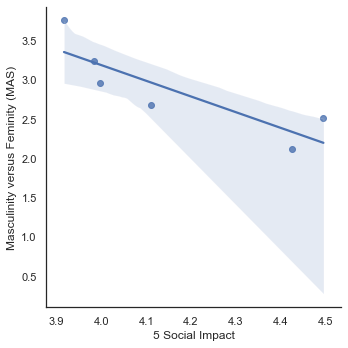

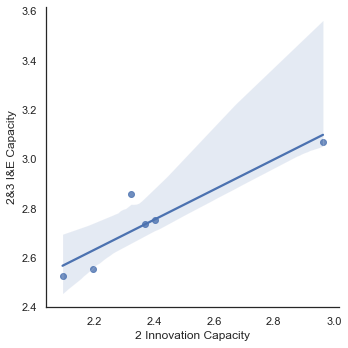

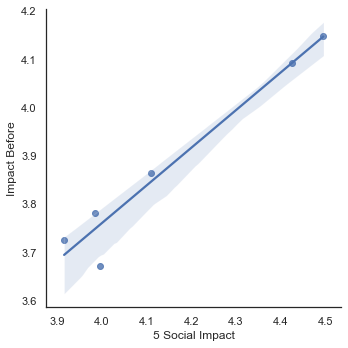

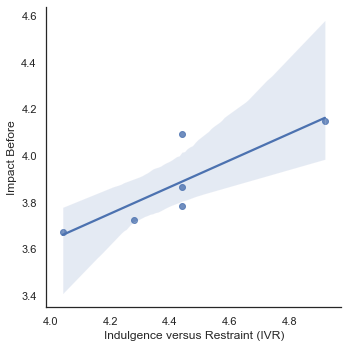

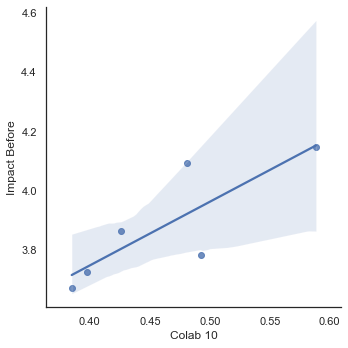

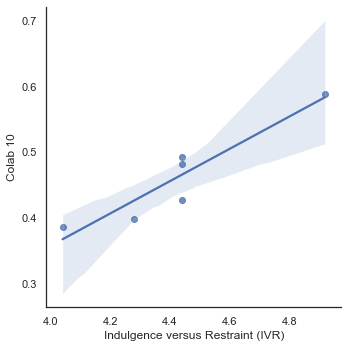

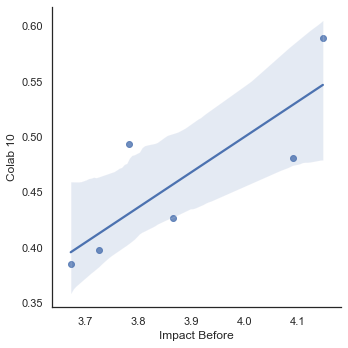

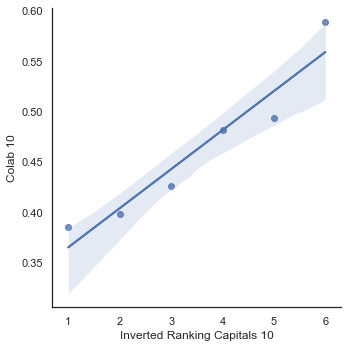

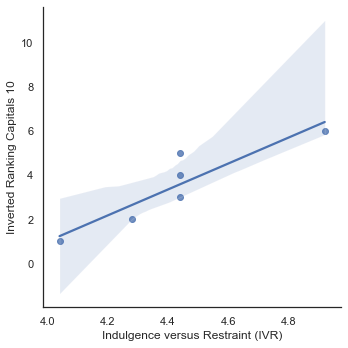

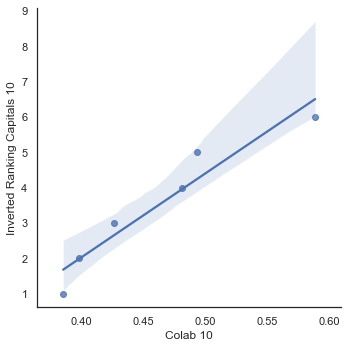

In [158]:
L=list(df_i_e_unified.columns)
for a in L:
    for b in L:
        if a!=b and significant_corr(df_i_e_unified, df_i_e_unified, a, b)[0]==True:
            print_significant_corr(df_i_e_unified, df_i_e_unified, a, b)
            print('')
            


## Part 8: Spider Comparisons

Ahora vamos a hacer visualizaciones tales como mapas de araña para comparar los datos que conocemos de dos capitales. 

In [159]:
#@title Función de spider plot
def make_spider_comparison(df ,country_name1, country_name2):
    from math import pi
    categories=list(df)
    N = len(categories)
  
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    fig = plt.figure(figsize=(8, 8))
    # Initialise the spider plot
    ax = plt.subplot(111, polar=True)
  
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories )
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([1,2,3,4,5], ["1","2","3","4",""], color="grey", size=13)
    plt.ylim(0,5)
  
  
    # ------- PART 2: Add plots
  
    # Plot each individual = each line of the data
    # I don't do a loop, because plotting more than 3 groups makes the chart unreadable
  
    # Ind1
    values=df.loc[country_name1].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=country_name1)
    ax.fill(angles, values, 'b', alpha=0.1)
  
    # Ind2
    values=df.loc[country_name2].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=country_name2)
    ax.fill(angles, values, 'r', alpha=0.1)
  
    # Add legend
    plt.legend( bbox_to_anchor=(0.05, 0.25))
    plt.tight_layout()

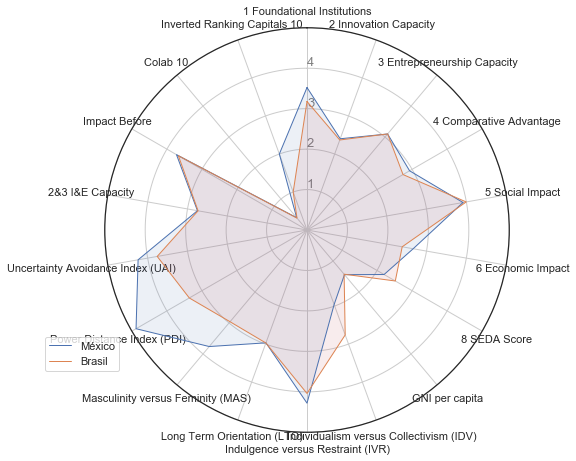

In [165]:
#make_spider_comparison(df_means,'Mexico','Uruguay')
make_spider_comparison(df_i_e_unified,'México','Brasil')

In [166]:
only_iecos = df_means.drop(['GNI per capita','SEDA Score'], axis = 1)
only_iecos

Pillars         1 Foundational Institutions  2.01 I-Human Capital  \
Country                                                             
Albania                              3.4732              2.207633   
Algeria                              3.0096              2.192006   
Argentina                            3.1684              2.021985   
Armenia                              3.6344              2.187459   
Australia                            4.3708              2.878032   
...                                     ...                   ...   
United Kingdom                       4.3396              3.340008   
United States                        4.2960              3.199162   
Uruguay                              3.7808              2.346297   
Vietnam                              3.3420              2.246327   
Zambia                               3.2760              2.210042   

Pillars         2.02 I-Funding  2.03 I-Infrastructure  2.04 I-Demand  \
Country                                                                
Albania               1.337470               2.598926       2.929778   
Algeria               1.674710               2.383803       2.573333   
Argentina             1.682002               2.740698       2.729778   
Armenia               1.398630               2.837184       2.718222   
Australia             2.064750               3.294983       3.268889   
...                        ...                    ...            ...   
United Kingdom        1.967984               3.715226       3.709333   
United States         3.764866               3.606783       4.223556   
Uruguay               1.464989               2.833698       2.578222   
Vietnam               1.419296               2.414585       3.025333   
Zambia                1.368727               2.163111       2.685778   

Pillars         2.05 I-Culture & Incentives  3.01 E-Human Capital  \
Country                                                             
Albania                              1.5660              3.428110   
Algeria                              2.4276              3.182732   
Argentina                            1.7930              3.076940   
Armenia                              1.3420              3.314949   
Australia                            2.8508              3.752603   
...                                     ...                   ...   
United Kingdom                       3.9660              2.853192   
United States                        3.4960              3.722513   
Uruguay                              1.2428              3.046434   
Vietnam                              1.8466              2.495265   
Zambia                               1.3756              2.655574   

Pillars         3.02 E-Funding  3.03 E-Infrastructure  3.04 E-Demand  \
Country                                                                
Albania               2.045130               3.478800         2.3690   
Algeria               1.738879               3.473333         3.2058   
Argentina             1.725475               3.679067         3.1718   
Armenia               2.167727               3.614267         2.6556   
Australia             2.823880               4.229333         3.4370   
...                        ...                    ...            ...   
United Kingdom        3.973914               4.286000         3.8236   
United States         7.088756               4.288533         4.3330   
Uruguay               2.006035               3.926000         2.7408   
Vietnam               2.147998               3.922667         3.2480   
Zambia                2.008592               2.763867         2.3574   

Pillars         3.05 E-Culture & Incentives  4 Comparative Advantage  \
Country                                                                
Albania                            3.133185                 2.074467   
Algeria                            3.351067                 2.399133   
Argentina                          2.89128

## Parte 9: Principal Component Analysis

In [167]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(only_iecos)
print(f"La varianza explicada es: {np.sum(pca.explained_variance_ratio_)} %")


print('')
print('PCA explained variance ratio')
print(pca.explained_variance_ratio_)

La varianza explicada es: 0.6438309886404782 %

PCA explained variance ratio
[0.40777726 0.14377097 0.09228276]


In [168]:
Components_df = pd.DataFrame({
    "Component_1": pca.components_[0],
    "Component_2": pca.components_[1],
    "Component_3": pca.components_[2],
    "Pilar" : only_iecos.columns})
Components_df.set_index('Pilar',inplace=True)

Components_df

Component_1  Component_2  Component_3
Pilar                                                                         
1 Foundational Institutions                 0.222799     0.003666    -0.128837
2.01 I-Human Capital                        0.246716     0.012619    -0.010214
2.02 I-Funding                              0.268126     0.127543     0.168100
2.03 I-Infrastructure                       0.253892    -0.029135    -0.120600
2.04 I-Demand                               0.191597    -0.018500     0.170829
2.05 I-Culture & Incentives                 0.275966     0.252698     0.507721
3.01 E-Human Capital                       -0.029480    -0.064913     0.025617
3.02 E-Funding                              0.245064    -0.122160     0.080909
3.03 E-Infrastructure                       0.241301     0.044787    -0.086108
3.04 E-Demand                               0.188147     0.014402     0.328570
3.05 E-Culture & Incentives                -0.039766    -0.096200     0.088252
4 Comparative Advantage                     0.212529    -0.159249     0.181209
5 Social Impact                             0.195262    -0.018866    -0.199386
6 Economic Impact                           0.075174    -0.002752    -0.031819
Individualism versus Collectivism (IDV)     0.441176    -0.085435    -0.266119
Indulgence versus Restraint (IVR)           0.112515    -0.599590     0.137706
Long Term Orientation (LTO)                 0.211117     0.660310    -0.206638
Masculinity versus Feminity (MAS)           0.020275     0.088920     0.389396
Power Distance Index (PDI)                 -0.317413     0.208363     0.355460
Uncertainty Avoidance Index (UAI)          -0.205343     0.089695    -0.197741

In [169]:
#aquí podemos observar en el primer componente, cuáles métricas contribuyen más/menos
Components_df['Component_1'].sort_values(ascending=False)

Pilar
Individualism versus Collectivism (IDV)    0.441176
2.05 I-Culture & Incentives                0.275966
2.02 I-Funding                             0.268126
2.03 I-Infrastructure                      0.253892
2.01 I-Human Capital                       0.246716
3.02 E-Funding                             0.245064
3.03 E-Infrastructure                      0.241301
1 Foundational Institutions                0.222799
4 Comparative Advantage                    0.212529
Long Term Orientation (LTO)                0.211117
5 Social Impact                            0.195262
2.04 I-Demand                              0.191597
3.04 E-Demand                              0.188147
Indulgence versus Restraint (IVR)          0.112515
6 Economic Impact                          0.075174
Masculinity versus Feminity (MAS)          0.020275
3.01 E-Human Capital                      -0.029480
3.05 E-Culture & Incentives               -0.039766
Uncertainty Avoidance Index (UAI)         -0.205343
Power 

In [170]:
#mismo para el segundo componente
Components_df['Component_2'].sort_values(ascending=False)

Pilar
Long Term Orientation (LTO)                0.660310
2.05 I-Culture & Incentives                0.252698
Power Distance Index (PDI)                 0.208363
2.02 I-Funding                             0.127543
Uncertainty Avoidance Index (UAI)          0.089695
Masculinity versus Feminity (MAS)          0.088920
3.03 E-Infrastructure                      0.044787
3.04 E-Demand                              0.014402
2.01 I-Human Capital                       0.012619
1 Foundational Institutions                0.003666
6 Economic Impact                         -0.002752
2.04 I-Demand                             -0.018500
5 Social Impact                           -0.018866
2.03 I-Infrastructure                     -0.029135
3.01 E-Human Capital                      -0.064913
Individualism versus Collectivism (IDV)   -0.085435
3.05 E-Culture & Incentives               -0.096200
3.02 E-Funding                            -0.122160
4 Comparative Advantage                   -0.159249
Indulg

In [ ]:
#mismo, para el tercer componente
Components_df['Component_3'].sort_values(ascending=False)

In [ ]:
Scores = pca.transform(only_iecos)
Score_df = pd.DataFrame({
    "Component_1":Scores[:,0],
    "Component_2": Scores[:,1],
    "Component_3": Scores[:,2],
    "Country" :df.index,
    "Region" :df['Region'],
    "Development" : df['Development Stage']
})

Score_df

In [ ]:
%pip install plotly==4.9.0
import plotly.express as px

In [ ]:
#fig = px.scatter_3d(Score_df, x='Component_1', y='Component_2', z='Component_3', color='Development', text='Country')
#fig.show()

## Buscando parejas de métricas correlacionadas significativamente

In [ ]:
iecosystems_m=['1 Foundational Institutions', '2.01 I-Human Capital', '2.02 I-Funding', '2.03 I-Infrastructure', '2.04 I-Demand',
      '2.05 I-Culture & Incentives', '3.01 E-Human Capital', '3.02 E-Funding', '3.03 E-Infrastructure', '3.04 E-Demand', 
      '3.05 E-Culture & Incentives', '4 Comparative Advantage', '5 Impact']

global_m=['avg strength', 'weight', 'Degree', 'Weighted Degree', 'Eccentricidad', 'Clustering',
          'Diámetro', 'Radio', 'Camino más corto promedio', 'Transitividad', 'Eficiencia Global', 
          'Small Worldness', 'Core Ratio', 'Central Point Dominance', 'Spectral radius']

significant_pairs=[]
for a in iecosystems_m:
    for b in global_m:
        if check_corr_significance(df_graph_ieco, df_graph_ieco, a, b)[0]:
            significant_pairs.append((a,b))

significant_pairs


In [ ]:
df_graph_ieco_with_detail = pd.concat([df_imputed,Graph_df], axis = 1)
df_graph_ieco_with_detail

In [ ]:
i_funding_components = ['2.02a R&D expenditure as a % GDP (UNESCO)',
                       '2.02b R&D expenditure in \'000 current PPP$ (UNESCO)',
                       '2.02c Public R&D Expenditure as % of total R&D expenditure (UNESCO)',
                       '2.02d Business Expenditure as % of total R&D expenditure (UNESCO)']

e_funding_components = ['3.02a VC investment',
                       '3.02b Financing of SME\'s (GCI 4.0)',
                       '3.02c Venture Capital Availability (GCI 4.0)',
                       '3.02d Ease of Credit (GII)',
                       '3.02e VC deals (GII)',
                       '3.02f Venture Capital Deal Volume']

comparative_advantage_components = ['4.01 State of cluster development (GCI 4.0)',
                                   '4.02 Country capacity to attract and retain talent']

impact_components = ['5.01 GDP per capita',
                    '5.02 Social Progress Index',
                    '5.03 Inclusive Development Index',
                    '5.04 Population below international poverty line (SDG 1 - No poverty)',
                    '5.05 Prevalence of undernourishment (SDG 2 - Zero Hunger)',
                    '5.06 Annual growth rate of real GDP per capita (SDG 8 - Decent Jobs and Economic Growth)',
                    '5.07 Unemployment rate of population 15 years of age and older (SDG 8 - Decent Jobs and Economic Growth)',
                    '5.08 Carbon dioxide emissions per unit of GDP (SDG 9 - Industry, Innovation and Infrastructure)',
                    '5.09 Proportion of urban population living in slums (SDG 11 - Sustainable Cities and Communities)',
                    '5.10 Annual population-weighted average mean concentration of fine suspended particles of less than 2.5 microns in diameter (SDG 11 - Sustainable Cities and Communities)',
                    '5.11 Domestic material consumption per capita (SDG 12 - Responsible Consumption and Production)']

collab_metrics = Graph_df.columns.values.tolist()
collab_metrics = collab_metrics[-16:]


In [ ]:
# ---
# correlations between I Funding and Comparative Advantage
# ---


significant_positives = []
significant_negatives = []

for a in i_funding_components:
    for b in comparative_advantage_components:
        CORR = check_corr_significance(df_graph_ieco_with_detail,df_graph_ieco_with_detail,a,b)
        if CORR[0]:
            if CORR[1]>0:
                significant_positives.append((a,b))
            else:
                significant_negatives.append((a,b))

for a,b in significant_positives:
    print('')
    print_corr_significance(df_graph_ieco_with_detail,a,b)
    
for a,b in significant_negatives:
    print('')
    print_corr_significance(df_graph_ieco_with_detail,a,b)
    

In [ ]:
# ---
# correlations between E Funding and Comparative Advantage
# ---


significant_positives = []
significant_negatives = []

for a in e_funding_components:
    for b in comparative_advantage_components:
        CORR = check_corr_significance(df_graph_ieco_with_detail,df_graph_ieco_with_detail,a,b)
        if CORR[0]:
            if CORR[1]>0:
                significant_positives.append((a,b))
            else:
                significant_negatives.append((a,b))


for a,b in significant_positives:
    print('')
    print_corr_significance(df_graph_ieco_with_detail,a,b)
    
for a,b in significant_negatives:
    print('')
    print_corr_significance(df_graph_ieco_with_detail,a,b)

In [ ]:
# ---
# correlations between I Funding and Impact
# ---


significant_positives = []
significant_negatives = []

for a in i_funding_components:
    for b in impact_components:
        CORR = check_corr_significance(df_graph_ieco_with_detail,df_graph_ieco_with_detail,a,b)
        if CORR[0]:
            if CORR[1]>0:
                significant_positives.append((a,b))
            else:
                significant_negatives.append((a,b))

for a,b in significant_positives:
    print('')
    print_corr_significance(df_graph_ieco_with_detail,a,b)
    
for a,b in significant_negatives:
    print('')
    print_corr_significance(df_graph_ieco_with_detail,a,b)

In [ ]:
# ---
# correlations between E Funding and Impact
# ---


significant_positives = []
significant_negatives = []

for a in e_funding_components:
    for b in impact_components:
        CORR = check_corr_significance(df_graph_ieco_with_detail,df_graph_ieco_with_detail,a,b)
        if CORR[0]:
            if CORR[1]>0:
                significant_positives.append((a,b))
            else:
                significant_negatives.append((a,b))

for a,b in significant_positives:
    print('')
    print_corr_significance(df_graph_ieco_with_detail,a,b)
    
for a,b in significant_negatives:
    print('')
    print_corr_significance(df_graph_ieco_with_detail,a,b)

In [ ]:
# ---
# correlations between Colaboration and Impact
# ---


significant_positives = []
significant_negatives = []

for a in collab_metrics:
    for b in impact_components:
        CORR = check_corr_significance(df_graph_ieco_with_detail,df_graph_ieco_with_detail,a,b)
        if CORR[0]:
            if CORR[1]>0:
                significant_positives.append((a,b))
            else:
                significant_negatives.append((a,b))

for a,b in significant_positives:
    print('')
    print_corr_significance(df_graph_ieco_with_detail,a,b)
    
for a,b in significant_negatives:
    print('')
    print_corr_significance(df_graph_ieco_with_detail,a,b)

In [ ]:
# ---
# correlations between Colaboration and Comparative Advantage
# ---


significant_positives = []
significant_negatives = []

for a in collab_metrics:
    for b in comparative_advantage_components:
        CORR = check_corr_significance(df_graph_ieco_with_detail,df_graph_ieco_with_detail,a,b)
        if CORR[0]:
            if CORR[1]>0:
                significant_positives.append((a,b))
            else:
                significant_negatives.append((a,b))

for a,b in significant_positives:
    print('')
    print_corr_significance(df_graph_ieco_with_detail,a,b)
    
for a,b in significant_negatives:
    print('')
    print_corr_significance(df_graph_ieco_with_detail,a,b)

In [ ]:
Graph_df

In [ ]:
#-------------------------------------------
# Scaling 1-5 parameters per country
#-------------------------------------------


negative_type_metrics = ['Eccentricidad', 'Diámetro', 'Radio', 
                         'Camino más corto promedio', 'Central Point Dominance', 'Spectral radius']

Graph_df_copy=Graph_df.copy()

mins = {metric: min(Graph_df[metric].to_list()) for metric in list(Graph_df)}
maxs = {metric: max(Graph_df[metric].to_list()) for metric in list(Graph_df)}


# Proceso de re-escalamiento de 0 a 1
for col in Graph_df_copy.columns:
    Graph_df_copy[col] = Graph_df_copy[col].apply(lambda x: (x-mins[col])/(maxs[col]-mins[col]))

# Rescalamiento de 1 a 5    
Graph_df_copy = np.round((Graph_df_copy*4)+1,2)

# Invertimos la escala de aquellas métricas de tipo negativo
for col in negative_type_metrics:
    Graph_df_copy[col] = Graph_df_copy[col].apply(lambda x: abs(5-x)+1)

Graph_df_copy


In [ ]:
#-------------------------------------------
# Spider Web visualization of each country
#-------------------------------------------

countries=['México', 'España', 'Uruguay', 'Brasil', 'Chile', 'Argentina']

for country1 in countries:
    for country2 in countries:
        if country1==country2:
            make_spider_comparison(Graph_df_copy,country1,country2)
            